In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [2]:
plant_gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'])
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'])

In [3]:
plant_gen['dt'] = plant_gen['DATE_TIME']
plant_weat['dt'] = plant_weat['DATE_TIME']
plant_gen = plant_gen.set_index('DATE_TIME')
plant_weat = plant_weat.set_index('DATE_TIME')

In [4]:
def plot_day_ac_mean_std(d1, d2):
    date = plant_gen[d1:d2]
    df = pd.DataFrame(columns=['Datetime', 'MeanAC', 'std'])
    i = 0
    for _, gp in date.groupby(by=date.index):
        df.loc[i] = [_, gp['AC_POWER'].mean(), gp['AC_POWER'].std()]
        i+=1
    plt.figure(figsize=(20, 10))
    for key in date['SOURCE_KEY'].unique():
        plt.plot(date[date['SOURCE_KEY'] == key].index, date[date['SOURCE_KEY'] == key]['AC_POWER'], 'o', color='black')

    df['Datetime'] = pd.to_datetime(df['Datetime'])
    plt.plot(df['Datetime'], df['MeanAC'], color='red')
    plt.plot(df['Datetime'], df['MeanAC'] + 3 * df['std'], color='blue')
    plt.plot(df['Datetime'], df['MeanAC'] - 3 * df['std'], color='green')
    plt.show()

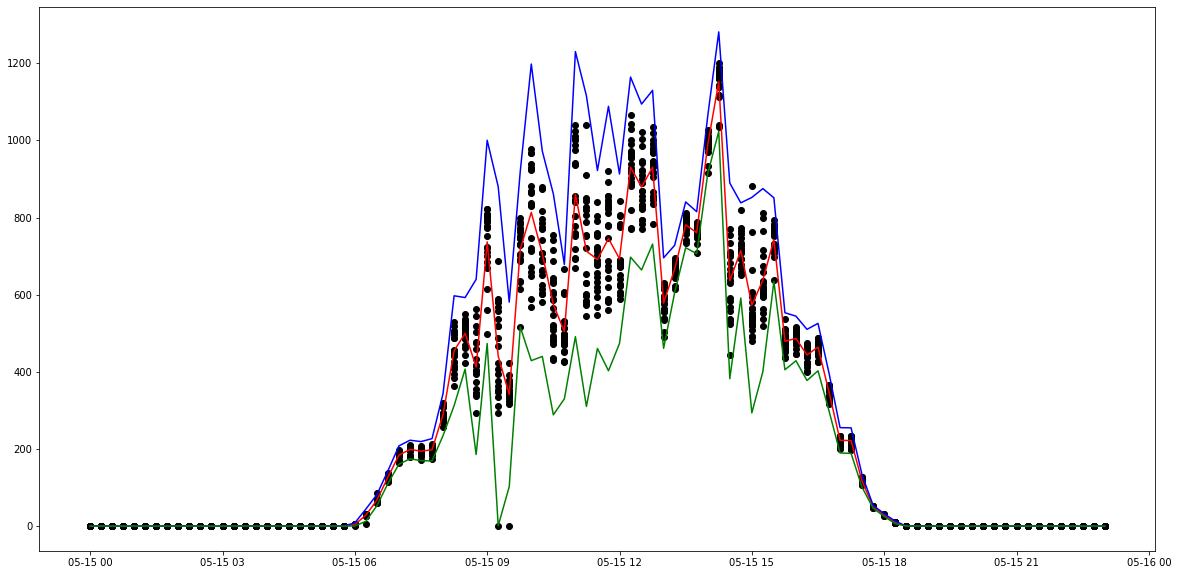

In [5]:
plot_day_ac_mean_std('2020-05-15 00:00:00', '2020-05-16 00:00:00')

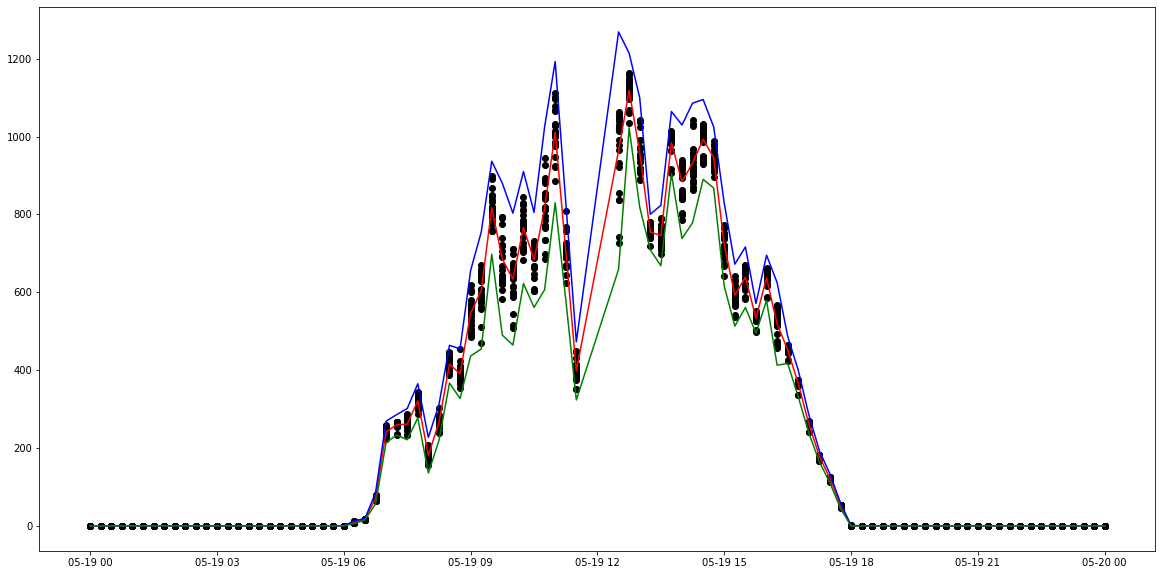

In [6]:
plot_day_ac_mean_std('2020-05-19 00:00:00', '2020-05-20 00:00:00')

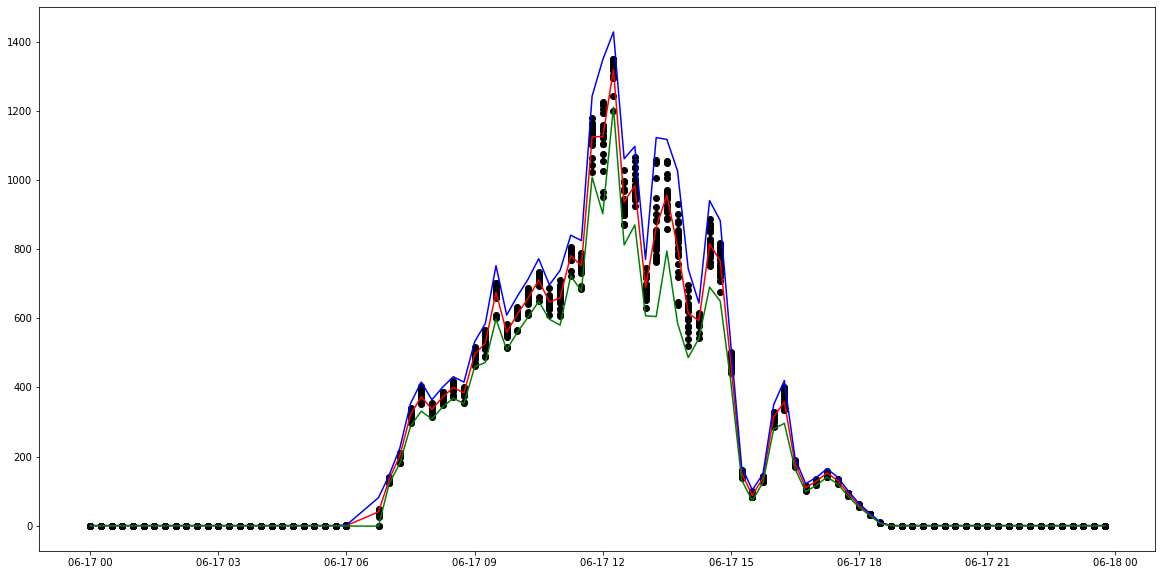

In [7]:
plot_day_ac_mean_std('2020-06-17 00:00:00', '2020-06-18 00:00:00')

In [8]:
def find_outliers(d1, d2, th=3):
    date = plant_gen[d1:d2] # get the data associated to d1:d2
    
    # df is going to b a dataframe which will contain MeanAC, std for each DATE_TIME
    df = pd.DataFrame(columns=['DATE_TIME', 'MeanAC', 'std'])
    i = 0
    for _, gp in date.groupby(by=date.index):
        df.loc[i] = [_, gp['AC_POWER'].mean(), gp['AC_POWER'].std()]
        i+=1
    # df is ready
    
    # a list to store all outlier inverters
    l = {}
    
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
    df.set_index('DATE_TIME', inplace=True)
    
    for key in date['SOURCE_KEY'].unique():
        inv_data = date[date['SOURCE_KEY'] == key]
        for d in inv_data.index:
            MeanAC = df[df.index == d]['MeanAC'][0]
            std = df[df.index == d]['std'][0]
            AC_POWER = inv_data[inv_data.index == d]['AC_POWER'][0]
            
            if AC_POWER > 0 and (MeanAC-th*std>=AC_POWER or MeanAC+th*std<=AC_POWER):
                if key in l:
                    l[key] += 1
                else:
                    l[key] = 1
    return l

In [9]:
for dayofyear in plant_gen['dt'].dt.dayofyear.unique():
    d = datetime(2020, 1, 1) + timedelta(int(dayofyear) - 1)
    year = d.year
    month = d.month if d.month > 9 else '0' + str(d.month)
    day = d.day if d.day > 9 else '0' + str(d.day)
    try:
        print(f'{year}-{month}-{day}', find_outliers(f'{year}-{month}-{day} 00:00:00', f'{year}-{month}-{day} 23:59:00'))
    except Exception as e:
        print(f'{year}-{month}-{day} 00:00:00', e)

2020-05-15 {'VHMLBKoKgIrUVDU': 1, 'z9Y9gH1T5YWrNuG': 1, 'YxYtjZvoooNbGkE': 1}


<ipython-input-8-e3a7e94ac123>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  date = plant_gen[d1:d2] # get the data associated to d1:d2


2020-05-16 {}
2020-05-17 {'1BY6WEcLGh8j5v7': 2, 'adLQvlD726eNBSB': 1}
2020-05-18 {'ZnxXDlPa8U1GXgE': 1, 'adLQvlD726eNBSB': 1, 'rGa61gmuvPhdLxV': 1}
2020-05-19 {}
2020-05-20 {'ZnxXDlPa8U1GXgE': 1, 'bvBOhCH3iADSZry': 6}


<ipython-input-8-e3a7e94ac123>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  date = plant_gen[d1:d2] # get the data associated to d1:d2


2020-05-21 {}
2020-05-22 {'McdE0feGgRqW7Ca': 1, 'rGa61gmuvPhdLxV': 10}
2020-05-23 {'1BY6WEcLGh8j5v7': 1, 'rGa61gmuvPhdLxV': 6, 'uHbuxQJl8lW7ozc': 1}
2020-05-24 {'uHbuxQJl8lW7ozc': 1, 'zBIq5rxdHJRwDNY': 1}
2020-05-25 {'ZnxXDlPa8U1GXgE': 1, 'ih0vzX44oOqAx2f': 2}
2020-05-26 {}
2020-05-27 {}
2020-05-28 {'1BY6WEcLGh8j5v7': 1}


<ipython-input-8-e3a7e94ac123>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  date = plant_gen[d1:d2] # get the data associated to d1:d2


2020-05-29 {}
2020-05-30 {'bvBOhCH3iADSZry': 4}
2020-05-31 {'adLQvlD726eNBSB': 1, 'bvBOhCH3iADSZry': 3}
2020-01-06 {'bvBOhCH3iADSZry': 1}
2020-02-06 {'bvBOhCH3iADSZry': 2}
2020-03-06 {'bvBOhCH3iADSZry': 1}
2020-04-06 {}
2020-05-06 {'uHbuxQJl8lW7ozc': 1}
2020-06-06 {}
2020-07-06 {'uHbuxQJl8lW7ozc': 1}
2020-08-06 {'1BY6WEcLGh8j5v7': 1}
2020-09-06 {'1BY6WEcLGh8j5v7': 1}
2020-10-06 {'3PZuoBAID5Wc2HD': 1, 'bvBOhCH3iADSZry': 2}
2020-11-06 {'bvBOhCH3iADSZry': 1}
2020-12-06 {'bvBOhCH3iADSZry': 5}
2020-06-13 {'WRmjgnKYAwPKWDb': 1, 'adLQvlD726eNBSB': 1}
2020-06-14 {'1BY6WEcLGh8j5v7': 2, 'bvBOhCH3iADSZry': 1}
2020-06-15 {'bvBOhCH3iADSZry': 1}
2020-06-16 {'bvBOhCH3iADSZry': 1, 'zBIq5rxdHJRwDNY': 1}
2020-06-17 {'adLQvlD726eNBSB': 1, 'bvBOhCH3iADSZry': 1}


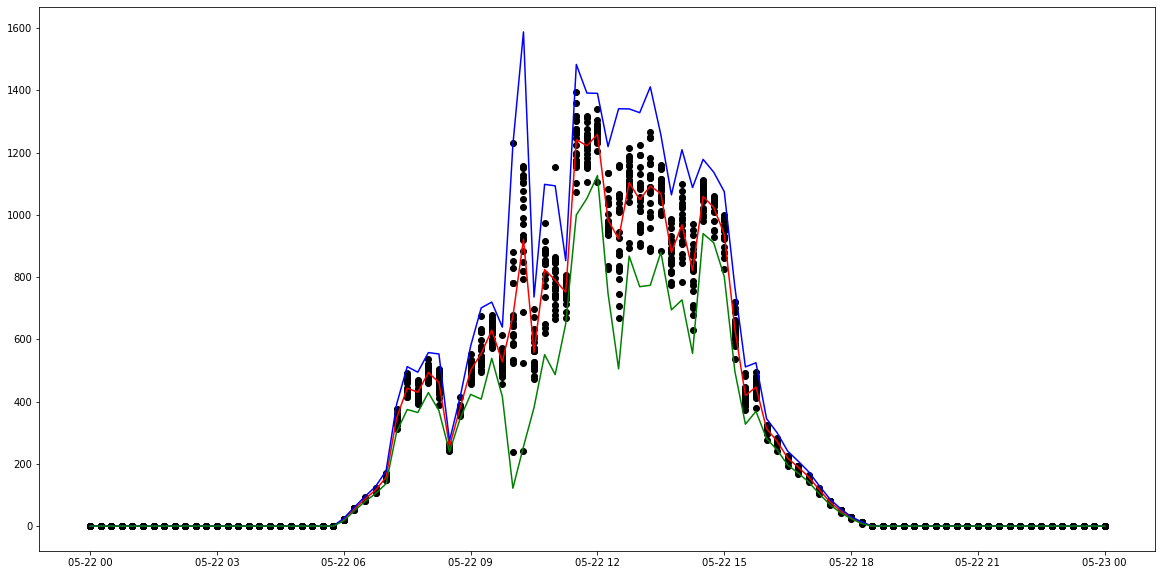

In [10]:
plot_day_ac_mean_std('2020-05-22 00:00:00', '2020-05-23 00:00:00')

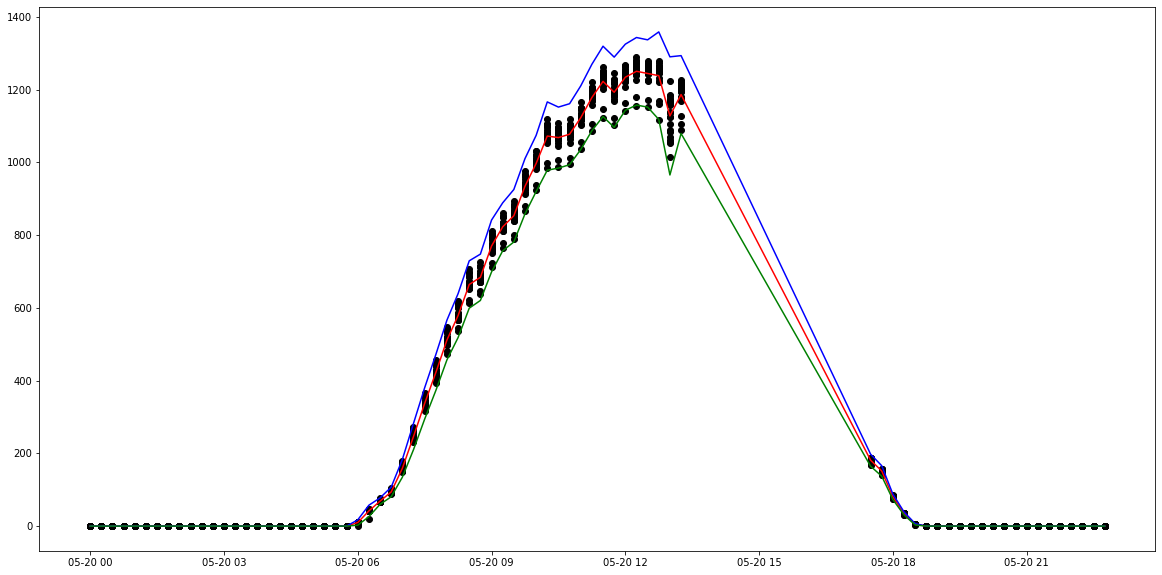

In [11]:
plot_day_ac_mean_std('2020-05-20 00:00:00', '2020-05-21 00:00:00')

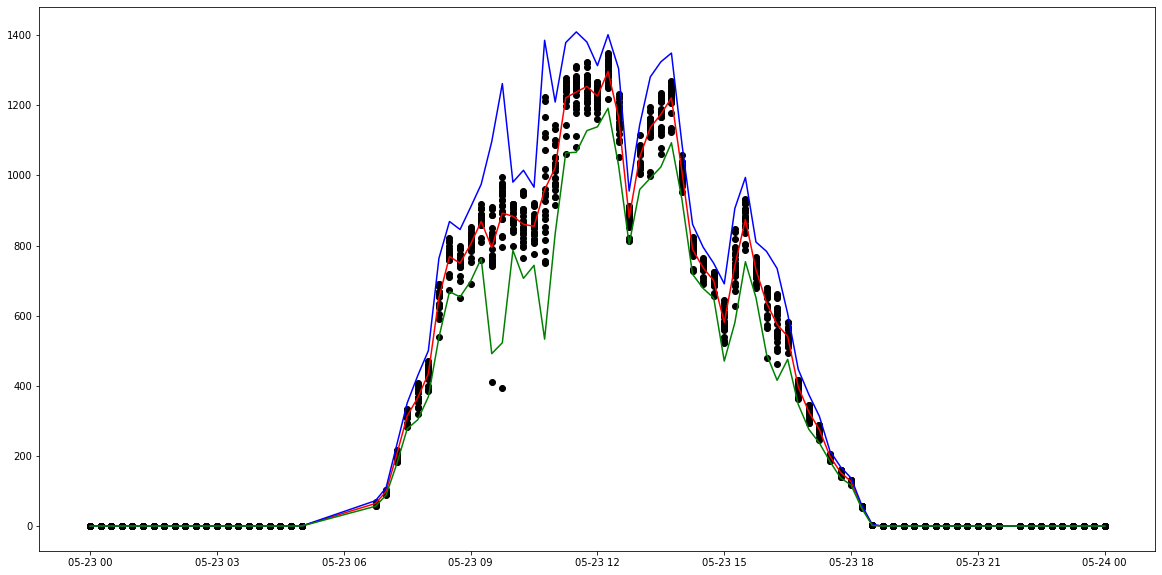

In [12]:
plot_day_ac_mean_std('2020-05-23 00:00:00', '2020-05-24 00:00:00')

In [13]:
for dayofyear in plant_gen['dt'].dt.dayofyear.unique():
    d = datetime(2020, 1, 1) + timedelta(int(dayofyear) - 1)
    year = d.year
    month = d.month if d.month > 9 else '0' + str(d.month)
    day = d.day if d.day > 9 else '0' + str(d.day)
    try:
        print(f'{year}-{month}-{day}', find_outliers(f'{year}-{month}-{day} 00:00:00', f'{year}-{month}-{day} 23:59:00', th=2))
    except Exception as e:
        print(f'{year}-{month}-{day} 00:00:00', e)

2020-05-15 {'1BY6WEcLGh8j5v7': 12, '3PZuoBAID5Wc2HD': 1, 'VHMLBKoKgIrUVDU': 1, 'WRmjgnKYAwPKWDb': 2, 'ZoEaEvLYb1n2sOq': 2, 'bvBOhCH3iADSZry': 7, 'ih0vzX44oOqAx2f': 2, 'uHbuxQJl8lW7ozc': 3, 'wCURE6d3bPkepu2': 1, 'z9Y9gH1T5YWrNuG': 2, 'zVJPv84UY57bAof': 8, 'YxYtjZvoooNbGkE': 2}


<ipython-input-8-e3a7e94ac123>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  date = plant_gen[d1:d2] # get the data associated to d1:d2


2020-05-16 {'1BY6WEcLGh8j5v7': 22, '3PZuoBAID5Wc2HD': 1, 'McdE0feGgRqW7Ca': 1, 'VHMLBKoKgIrUVDU': 2, 'WRmjgnKYAwPKWDb': 3, 'bvBOhCH3iADSZry': 31, 'pkci93gMrogZuBj': 3, 'rGa61gmuvPhdLxV': 1, 'uHbuxQJl8lW7ozc': 3, 'z9Y9gH1T5YWrNuG': 1, '1IF53ai7Xc0U56Y': 1, 'adLQvlD726eNBSB': 2}
2020-05-17 {'1BY6WEcLGh8j5v7': 17, '3PZuoBAID5Wc2HD': 1, 'McdE0feGgRqW7Ca': 1, 'VHMLBKoKgIrUVDU': 1, 'WRmjgnKYAwPKWDb': 2, 'adLQvlD726eNBSB': 6, 'bvBOhCH3iADSZry': 19, 'pkci93gMrogZuBj': 5, 'uHbuxQJl8lW7ozc': 1, 'z9Y9gH1T5YWrNuG': 3}
2020-05-18 {'1BY6WEcLGh8j5v7': 33, '7JYdWkrLSPkdwr4': 1, 'WRmjgnKYAwPKWDb': 1, 'ZnxXDlPa8U1GXgE': 1, 'adLQvlD726eNBSB': 1, 'bvBOhCH3iADSZry': 43, 'iCRJl6heRkivqQ3': 1, 'pkci93gMrogZuBj': 1, 'rGa61gmuvPhdLxV': 1, 'uHbuxQJl8lW7ozc': 1}
2020-05-19 {'1BY6WEcLGh8j5v7': 14, '3PZuoBAID5Wc2HD': 1, 'VHMLBKoKgIrUVDU': 2, 'WRmjgnKYAwPKWDb': 1, 'ZoEaEvLYb1n2sOq': 1, 'bvBOhCH3iADSZry': 18, 'rGa61gmuvPhdLxV': 1, 'uHbuxQJl8lW7ozc': 5, 'z9Y9gH1T5YWrNuG': 1}
2020-05-20 {'1BY6WEcLGh8j5v7': 19, '1IF53a

<ipython-input-8-e3a7e94ac123>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  date = plant_gen[d1:d2] # get the data associated to d1:d2


2020-05-21 {'1BY6WEcLGh8j5v7': 13, 'McdE0feGgRqW7Ca': 1, 'ZnxXDlPa8U1GXgE': 2, 'ZoEaEvLYb1n2sOq': 2, 'adLQvlD726eNBSB': 3, 'bvBOhCH3iADSZry': 14, 'iCRJl6heRkivqQ3': 1, 'pkci93gMrogZuBj': 1, 'uHbuxQJl8lW7ozc': 6, 'z9Y9gH1T5YWrNuG': 1, 'zVJPv84UY57bAof': 1}
2020-05-22 {'1BY6WEcLGh8j5v7': 10, '1IF53ai7Xc0U56Y': 1, '3PZuoBAID5Wc2HD': 1, 'McdE0feGgRqW7Ca': 2, 'WRmjgnKYAwPKWDb': 2, 'YxYtjZvoooNbGkE': 1, 'ZoEaEvLYb1n2sOq': 1, 'adLQvlD726eNBSB': 5, 'bvBOhCH3iADSZry': 6, 'iCRJl6heRkivqQ3': 1, 'pkci93gMrogZuBj': 1, 'rGa61gmuvPhdLxV': 20, 'uHbuxQJl8lW7ozc': 1, 'zBIq5rxdHJRwDNY': 2}
2020-05-23 {'1BY6WEcLGh8j5v7': 15, '7JYdWkrLSPkdwr4': 1, 'WRmjgnKYAwPKWDb': 1, 'ZnxXDlPa8U1GXgE': 1, 'ZoEaEvLYb1n2sOq': 1, 'bvBOhCH3iADSZry': 19, 'pkci93gMrogZuBj': 2, 'rGa61gmuvPhdLxV': 13, 'uHbuxQJl8lW7ozc': 3, 'z9Y9gH1T5YWrNuG': 1}
2020-05-24 {'1BY6WEcLGh8j5v7': 3, '3PZuoBAID5Wc2HD': 2, 'VHMLBKoKgIrUVDU': 1, 'ZnxXDlPa8U1GXgE': 1, 'ZoEaEvLYb1n2sOq': 1, 'adLQvlD726eNBSB': 7, 'bvBOhCH3iADSZry': 9, 'ih0vzX44oOqAx2f': 5,

<ipython-input-8-e3a7e94ac123>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  date = plant_gen[d1:d2] # get the data associated to d1:d2


2020-05-29 {'1BY6WEcLGh8j5v7': 19, 'ZoEaEvLYb1n2sOq': 2, 'bvBOhCH3iADSZry': 30, 'iCRJl6heRkivqQ3': 1, 'pkci93gMrogZuBj': 1, 'uHbuxQJl8lW7ozc': 4, 'wCURE6d3bPkepu2': 1, 'z9Y9gH1T5YWrNuG': 2, 'zBIq5rxdHJRwDNY': 6, 'zVJPv84UY57bAof': 1}
2020-05-30 {'1BY6WEcLGh8j5v7': 28, 'McdE0feGgRqW7Ca': 1, 'WRmjgnKYAwPKWDb': 4, 'adLQvlD726eNBSB': 4, 'bvBOhCH3iADSZry': 34, 'iCRJl6heRkivqQ3': 1, 'z9Y9gH1T5YWrNuG': 3}
2020-05-31 {'1BY6WEcLGh8j5v7': 20, 'ZoEaEvLYb1n2sOq': 1, 'adLQvlD726eNBSB': 3, 'bvBOhCH3iADSZry': 22, 'ih0vzX44oOqAx2f': 1, 'pkci93gMrogZuBj': 3, 'wCURE6d3bPkepu2': 2, 'z9Y9gH1T5YWrNuG': 4}
2020-01-06 {'1BY6WEcLGh8j5v7': 17, 'WRmjgnKYAwPKWDb': 1, 'ZoEaEvLYb1n2sOq': 1, 'adLQvlD726eNBSB': 9, 'bvBOhCH3iADSZry': 21, 'iCRJl6heRkivqQ3': 1, 'pkci93gMrogZuBj': 2, 'uHbuxQJl8lW7ozc': 3, 'z9Y9gH1T5YWrNuG': 3}
2020-02-06 {'1BY6WEcLGh8j5v7': 17, '1IF53ai7Xc0U56Y': 1, 'McdE0feGgRqW7Ca': 3, 'WRmjgnKYAwPKWDb': 1, 'adLQvlD726eNBSB': 4, 'bvBOhCH3iADSZry': 28, 'pkci93gMrogZuBj': 2, 'z9Y9gH1T5YWrNuG': 7}
2020-0

In [14]:
merged_df = pd.merge(plant_gen, plant_weat, how='inner', on='DATE_TIME')
merged_df.head()

,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,dt_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,dt_y
DATE_TIME,,,,,,,,,,,,,
2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15


0.0007975282128443703 0.005896380756916237
0.000748923580957548 -0.003185895206583604
0.0007497567113869944 -0.0022625190851601664
0.0007664915963270694 -0.0025498498087297827
0.000747358497195566 -0.0017881379823258806
0.0007463402479903013 -0.0020804028169534344
0.0007638174258350421 -0.0020128899020324122
0.0007529307528610275 -0.0020612831236878357
0.0007719077750015997 -0.003214171898122972
0.0007386499386507249 -0.002829997357436132
0.0008124562618115104 0.00494364000785734
0.0007578669253649118 -0.0028830241052234295
0.0007746984464591464 -0.0012689315083100445
0.0007636065067779025 -0.002396746839681158
0.0007640003810025424 -0.0021751172131331976
0.0007658792241256485 -0.003005554195589729
0.0007556859777898987 -0.002214903977516451
0.0007513593034579254 -0.0010114090544215892
0.0007593059378402595 -0.001311749863510643
0.0007708908946265871 -0.001782533393622699


<ipython-input-18-06c0bacd4950>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20, 10))


0.0007576757436617548 -0.001842139241655621
0.0007646688682614589 -0.0025992915953459853


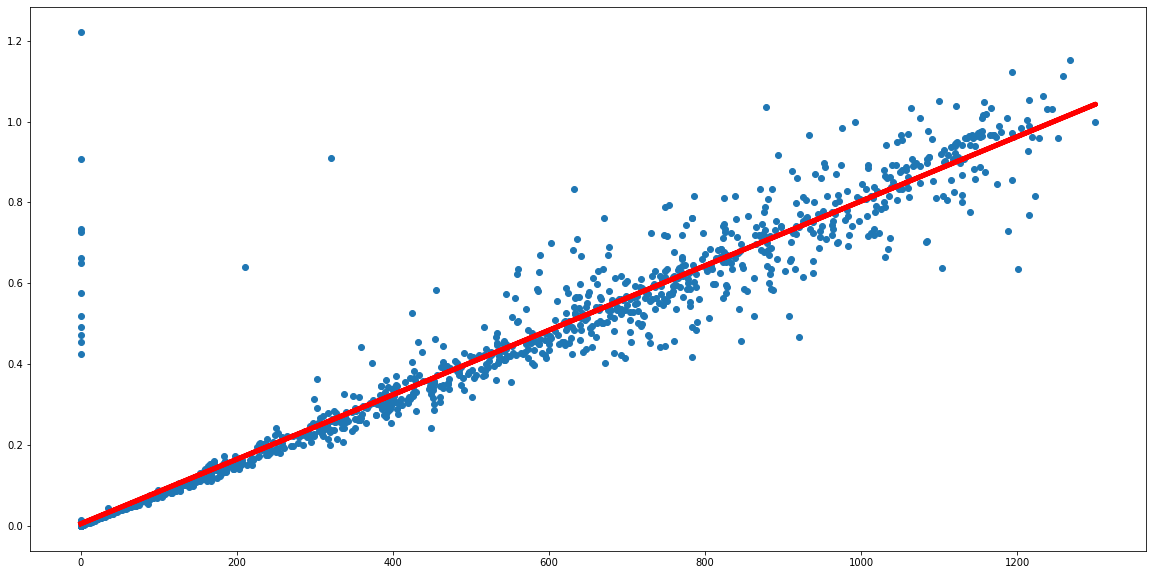

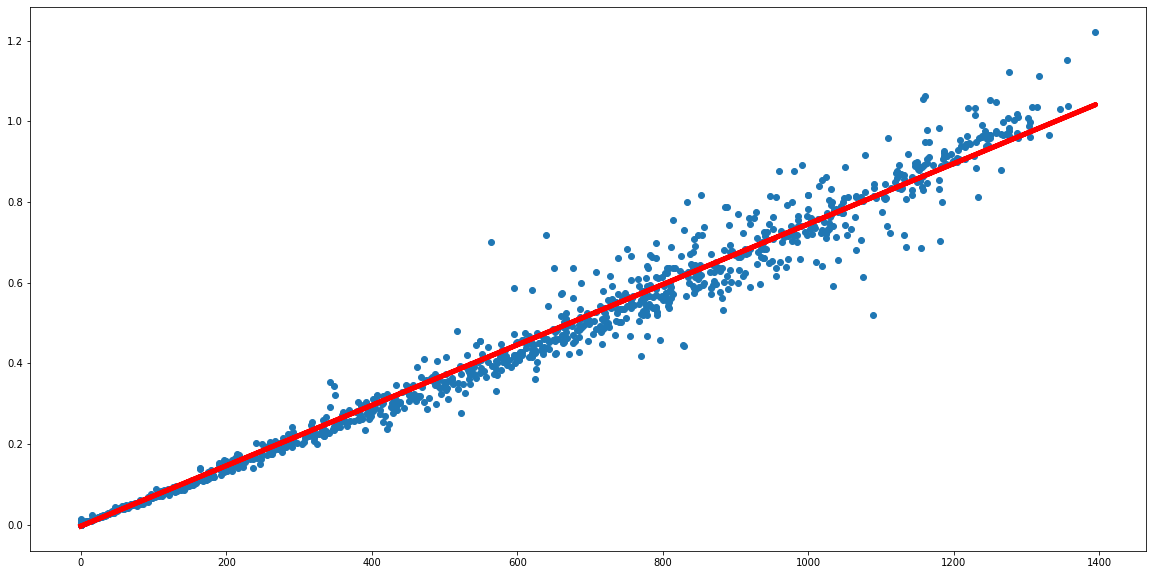

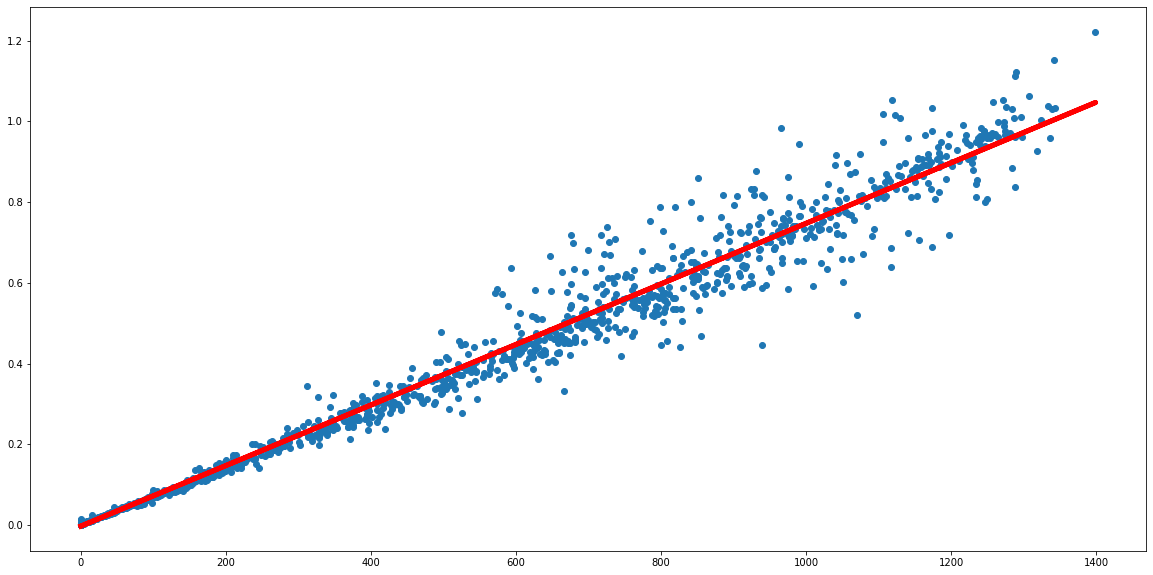

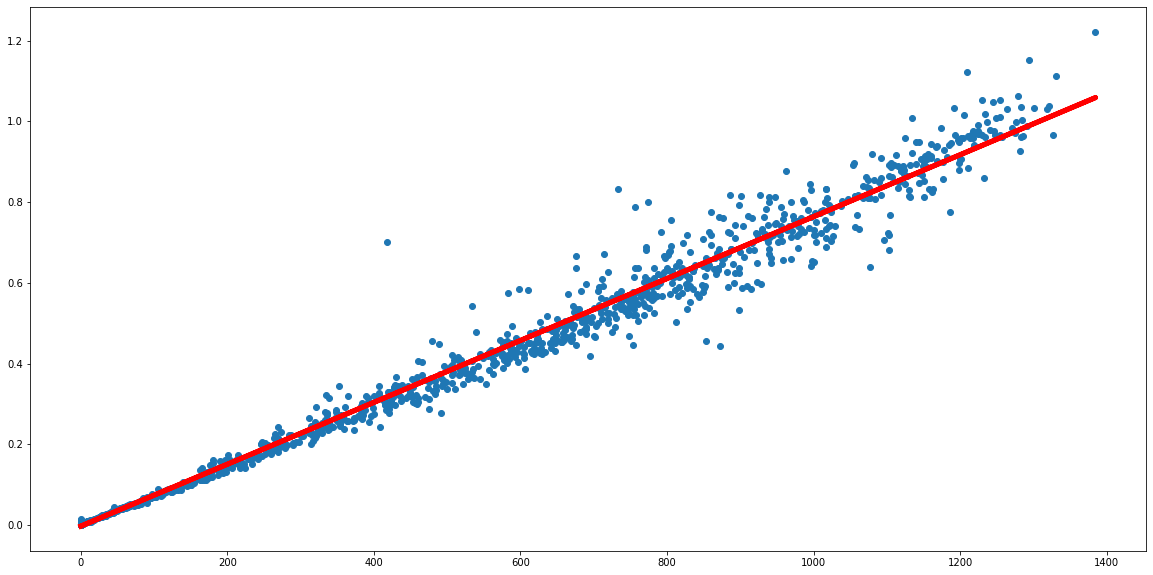

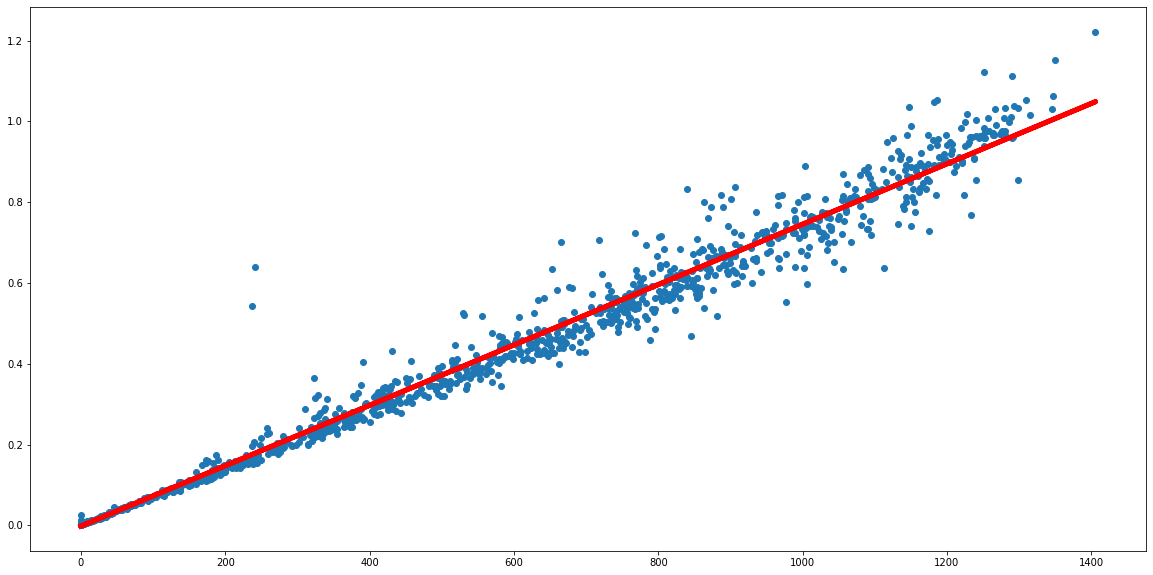

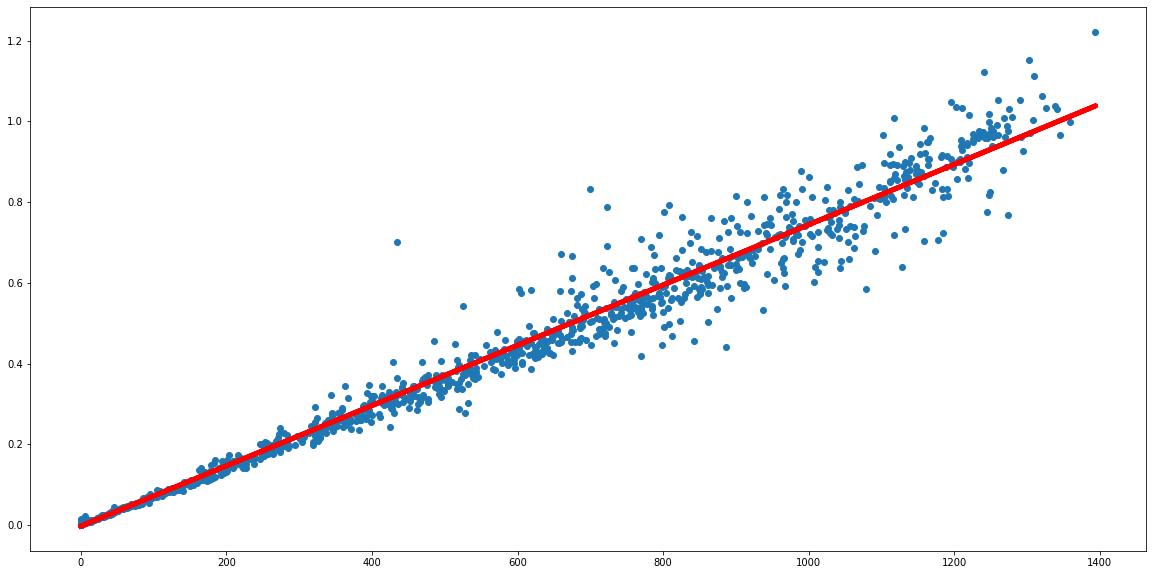

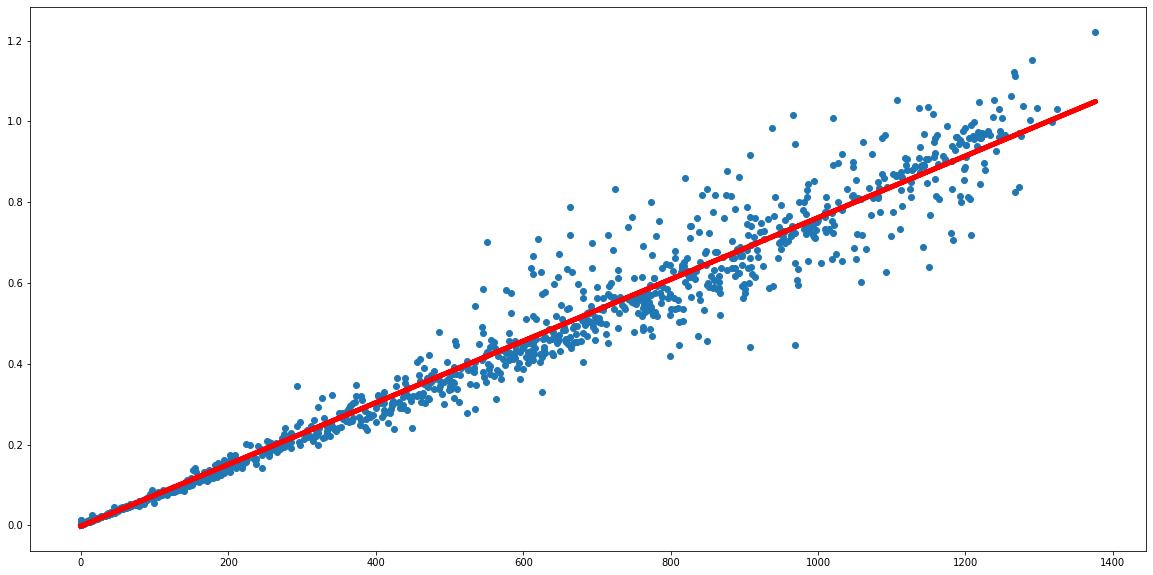

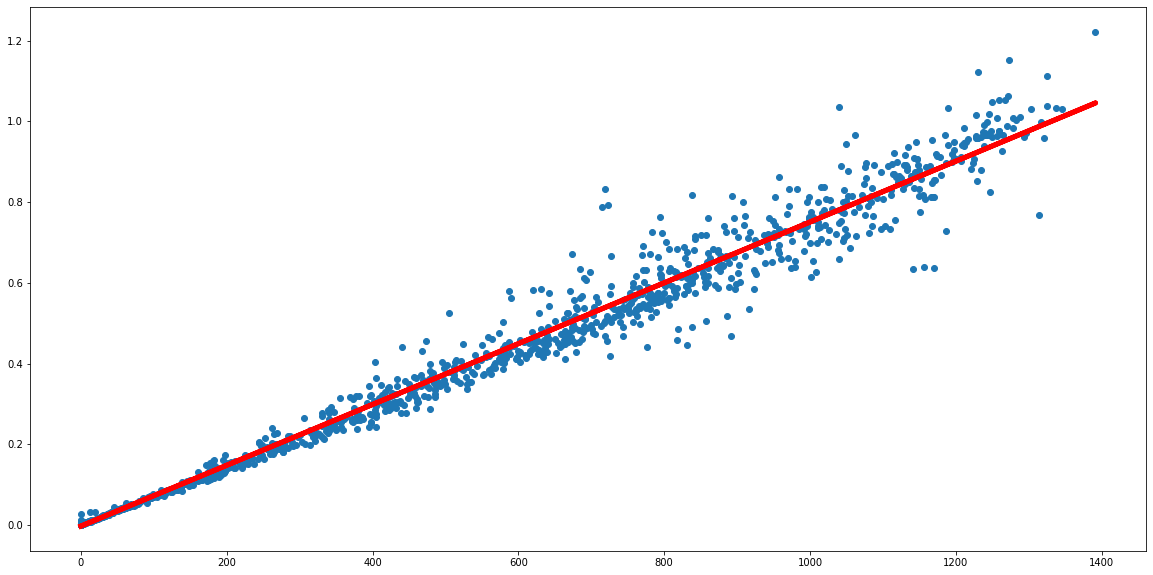

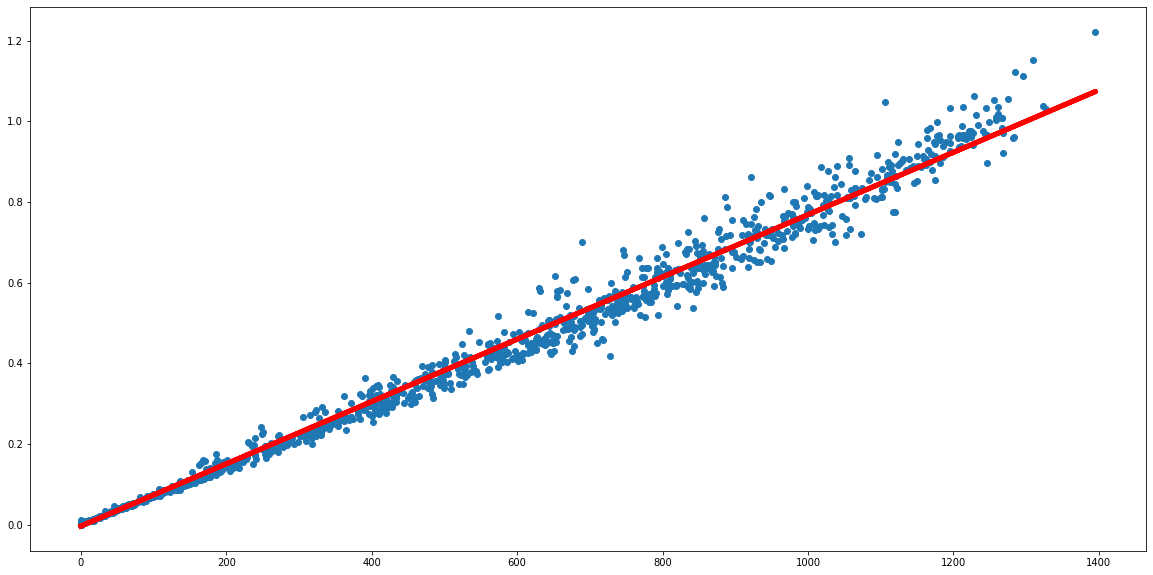

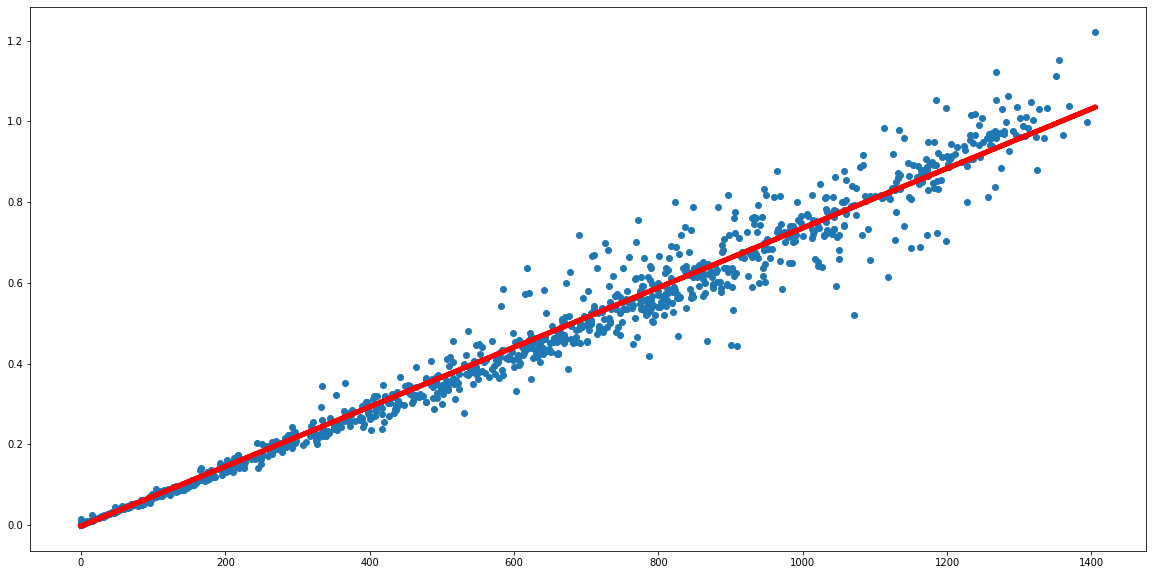

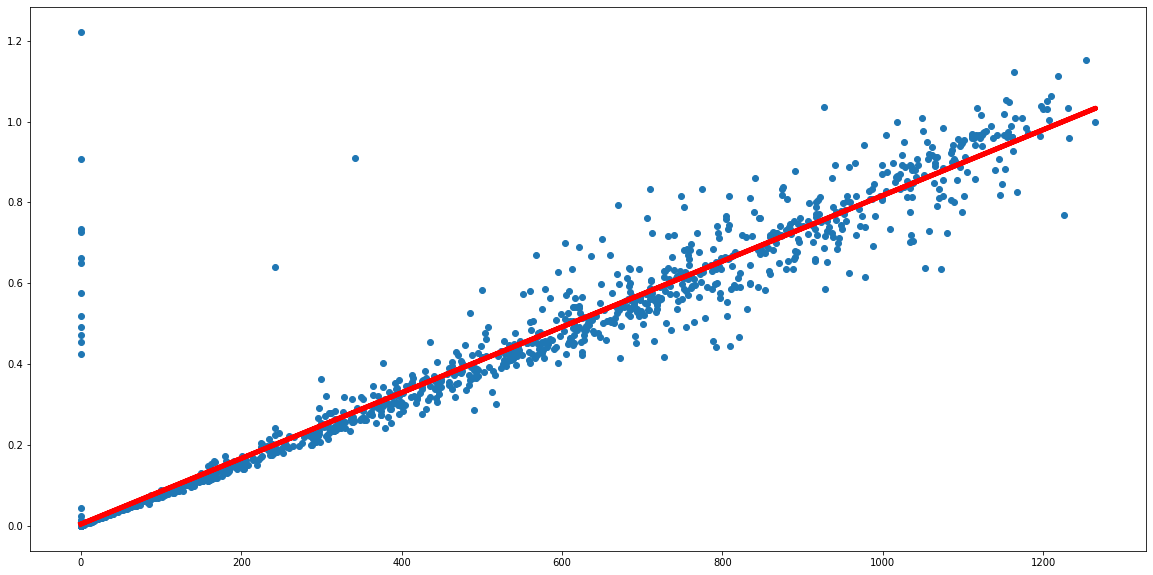

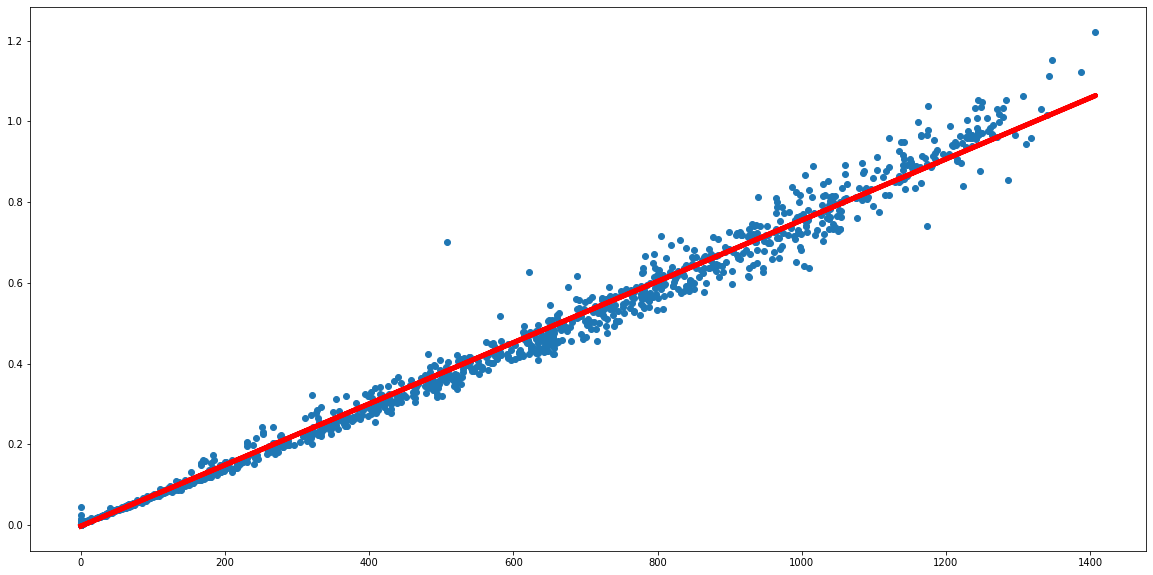

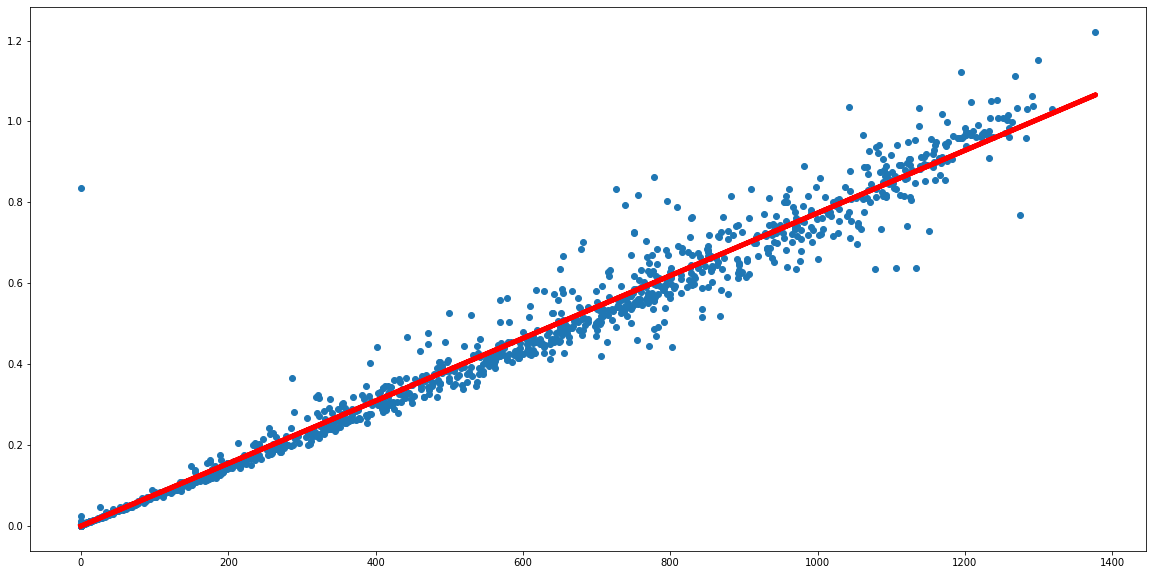

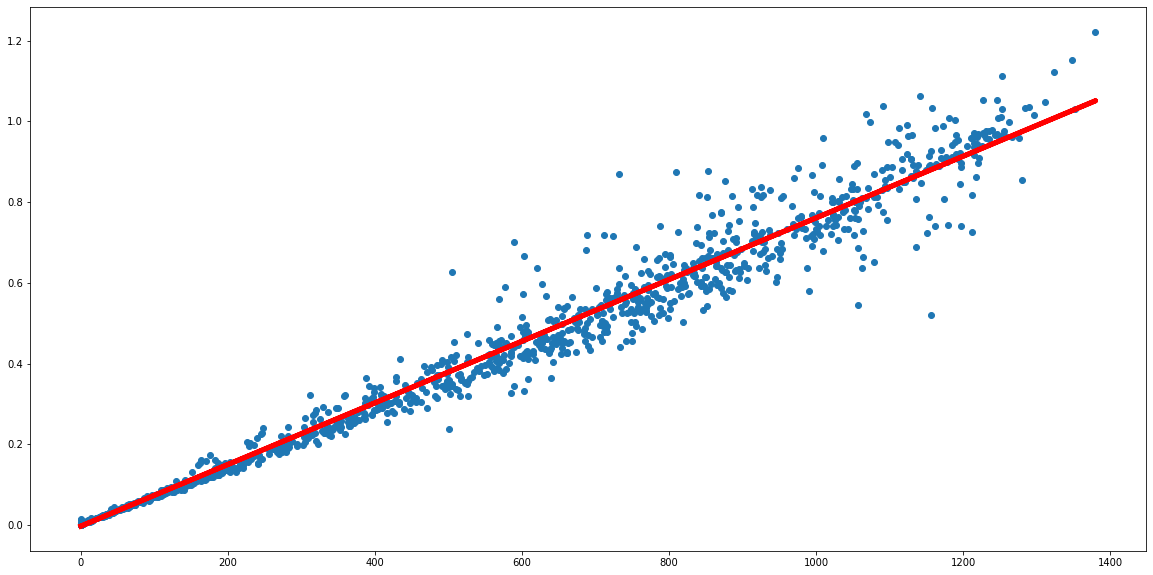

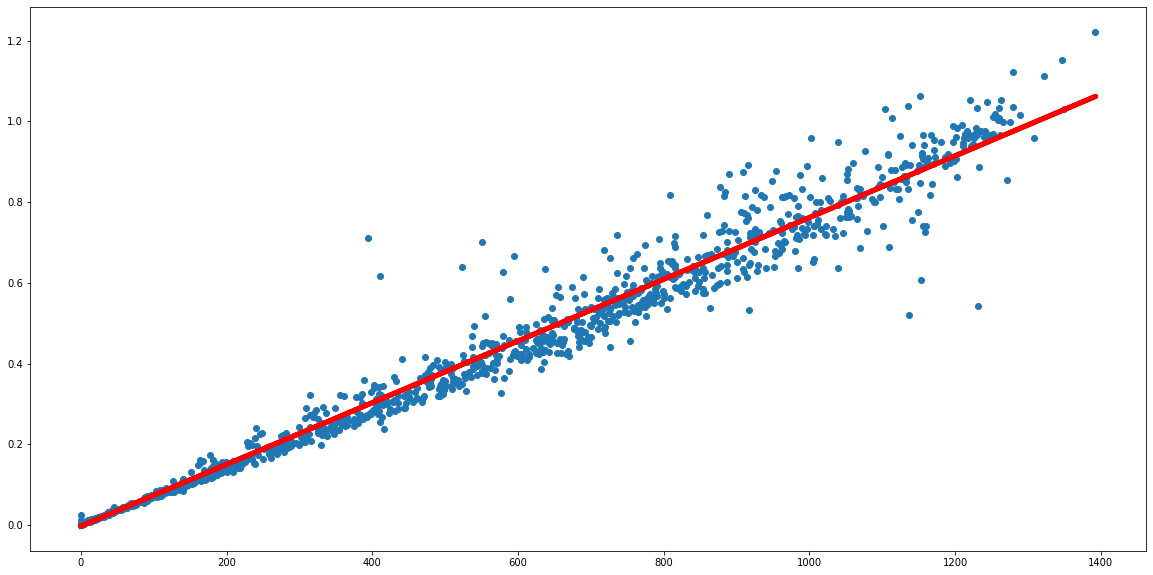

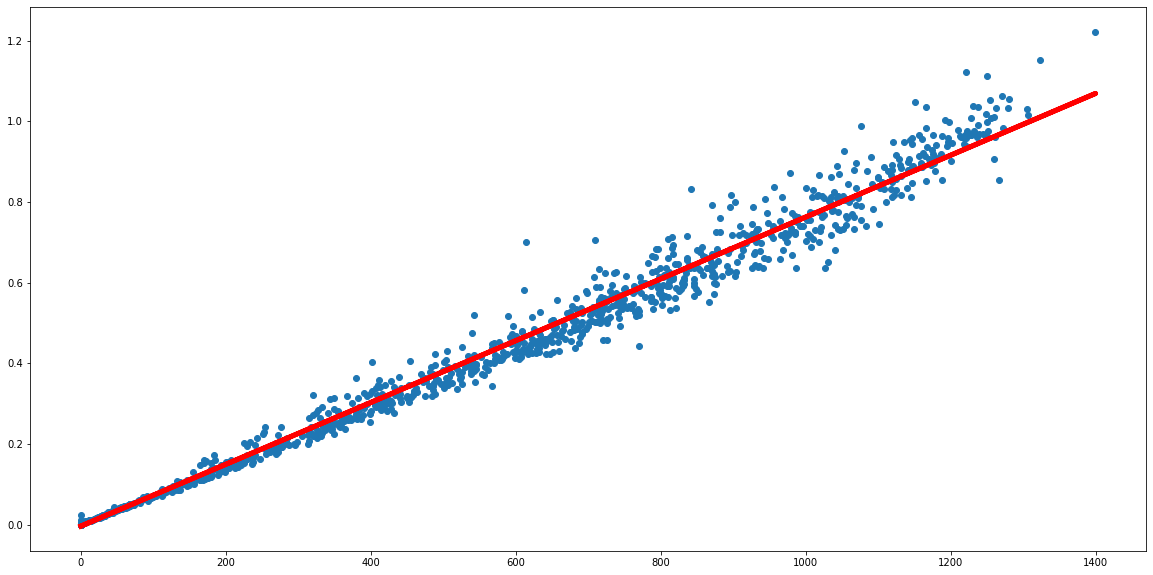

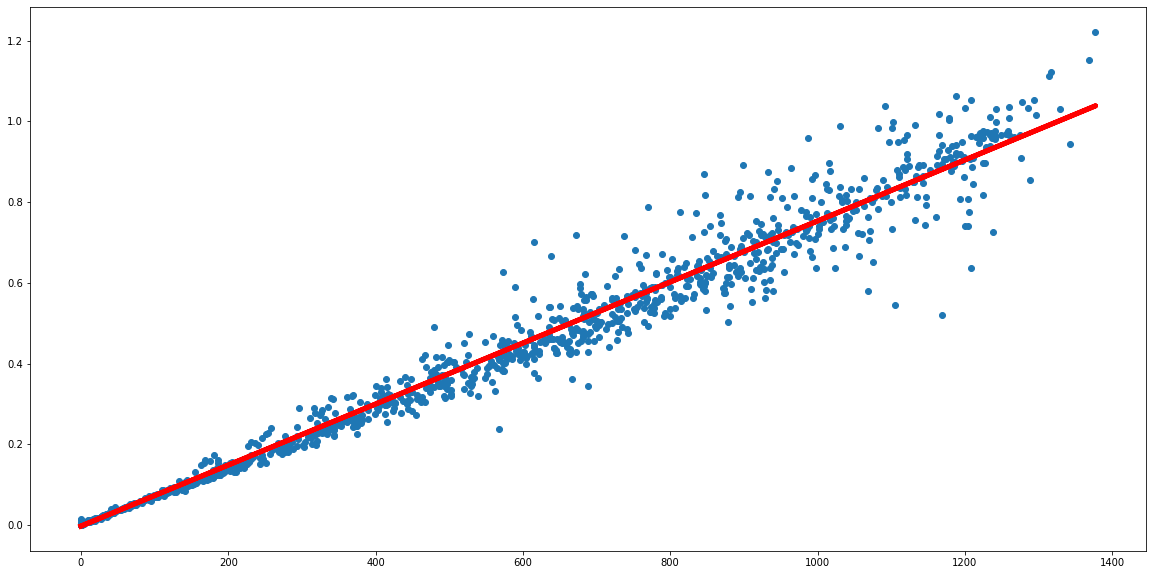

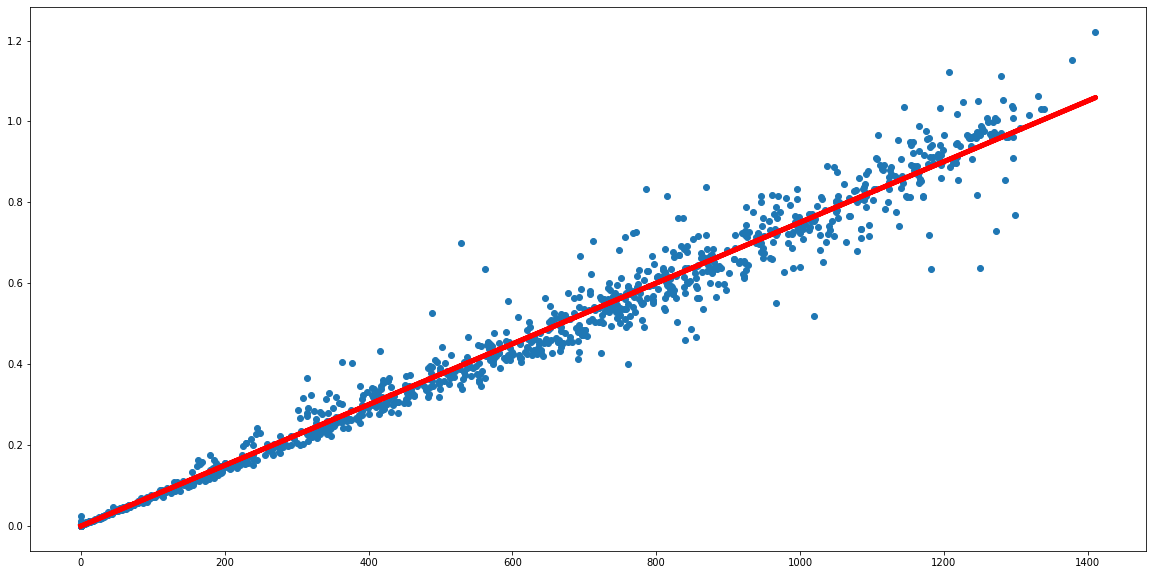

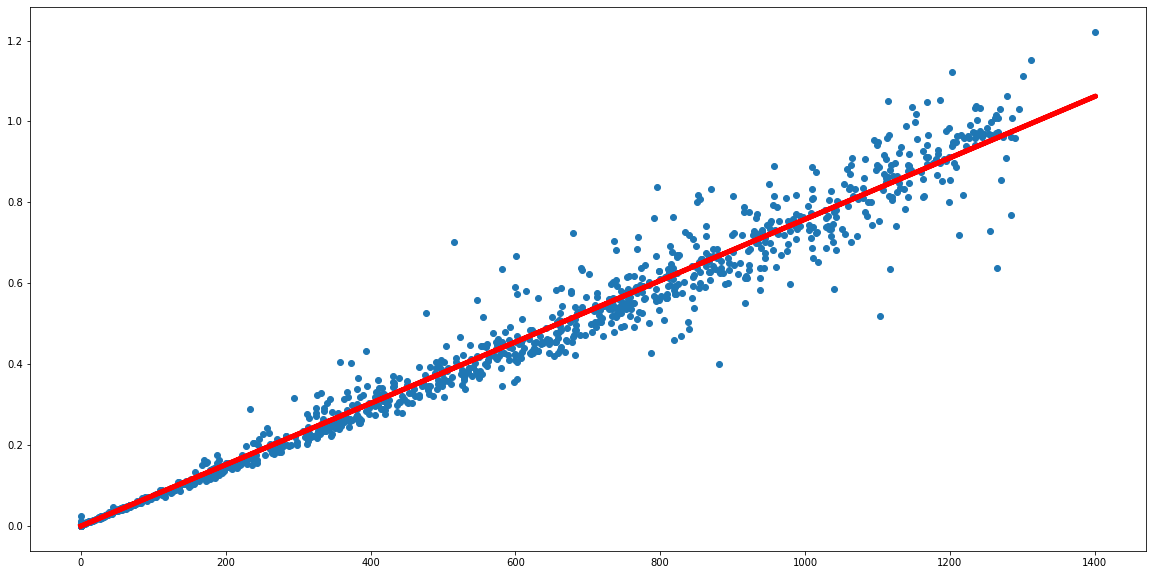

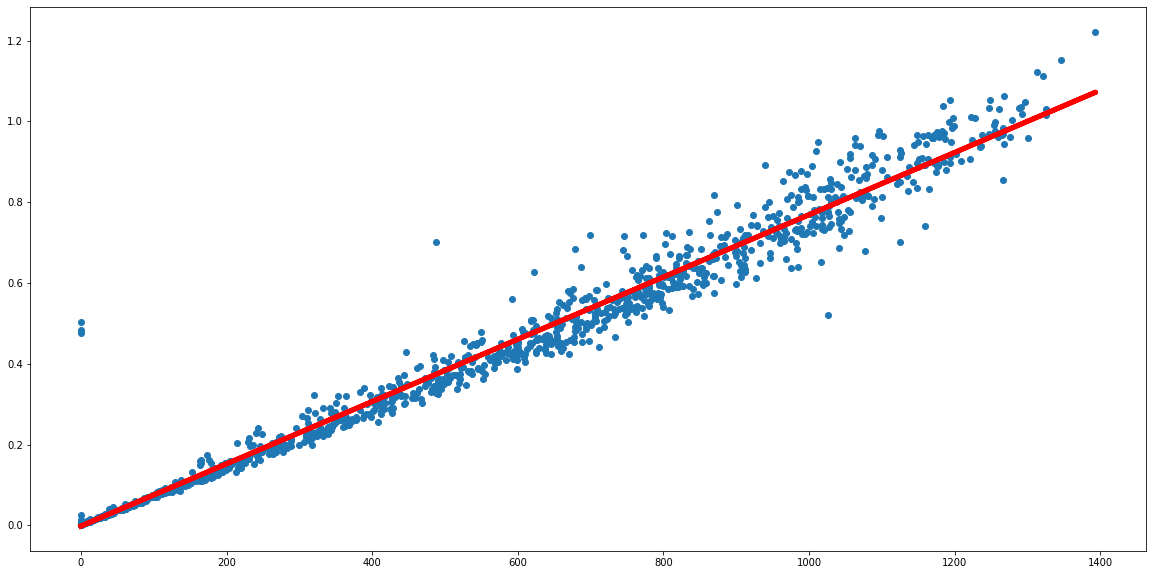

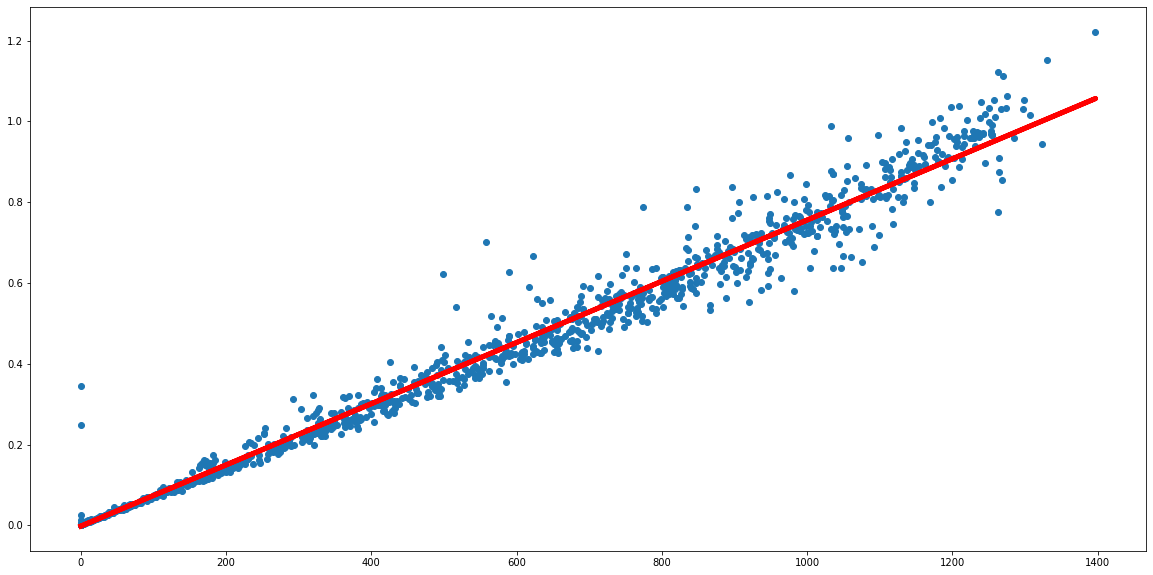

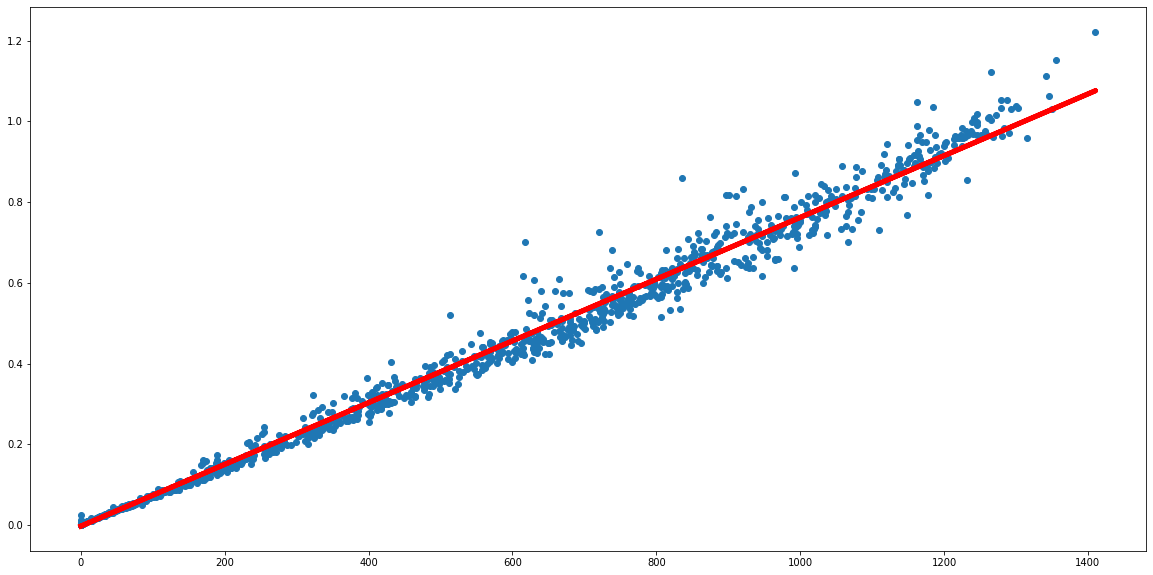

In [18]:
ms = []
for key in merged_df['SOURCE_KEY_x'].unique():
    inv_data = merged_df[merged_df['SOURCE_KEY_x'] == key]
    y = inv_data['IRRADIATION']
    x = inv_data['AC_POWER']
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, 'o')
    m, b = np.polyfit(x, y, 1)
    ms.append(m)
    print(m, b)
    plt.plot(x, m*x + b, linewidth=5, color='red')
plt.show()

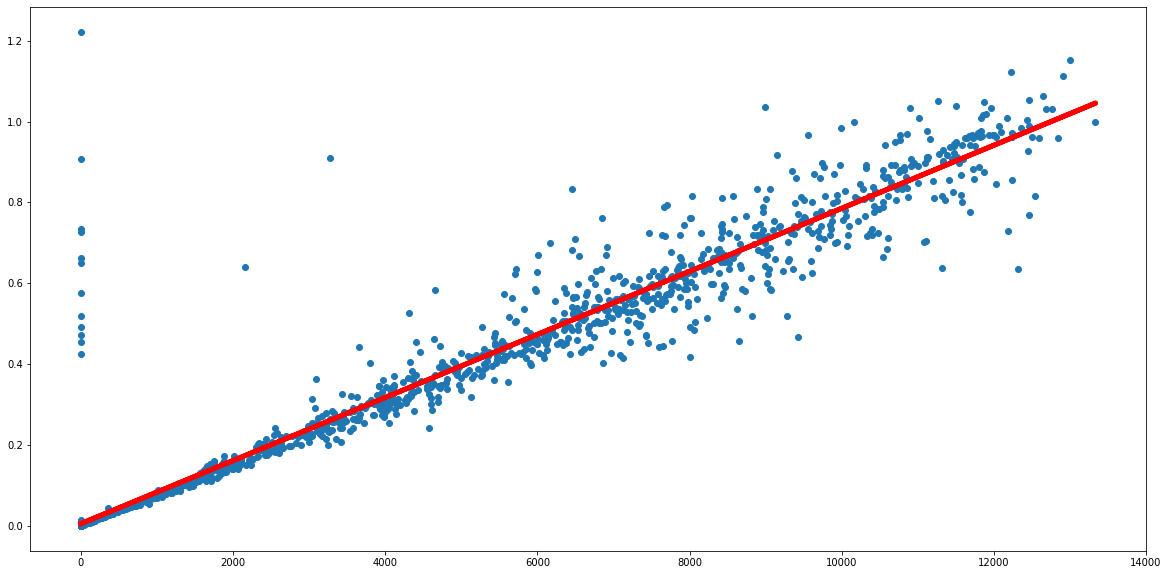

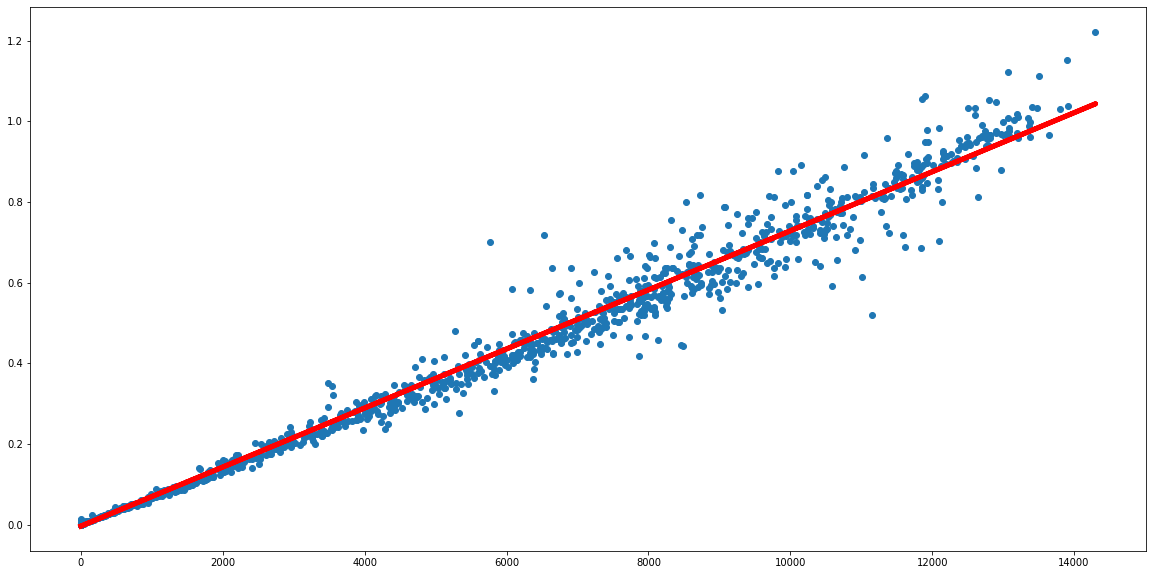

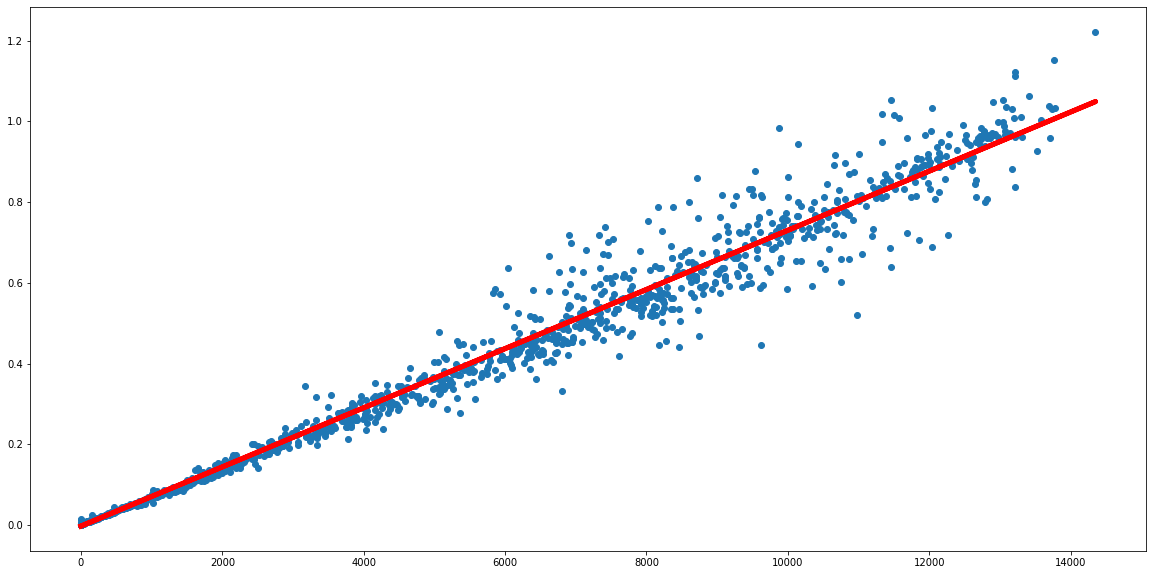

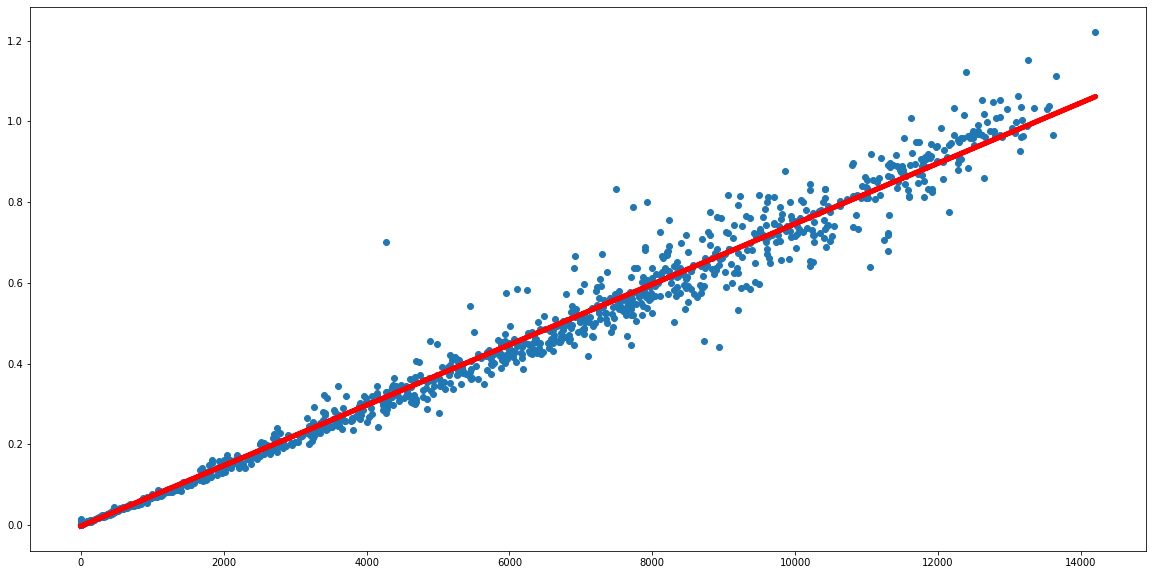

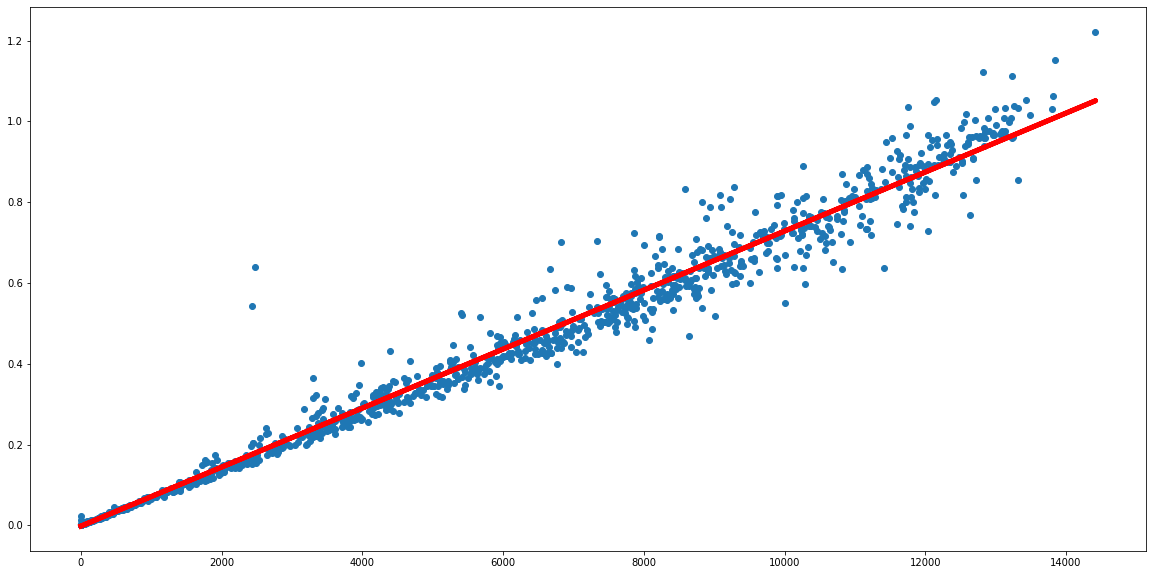

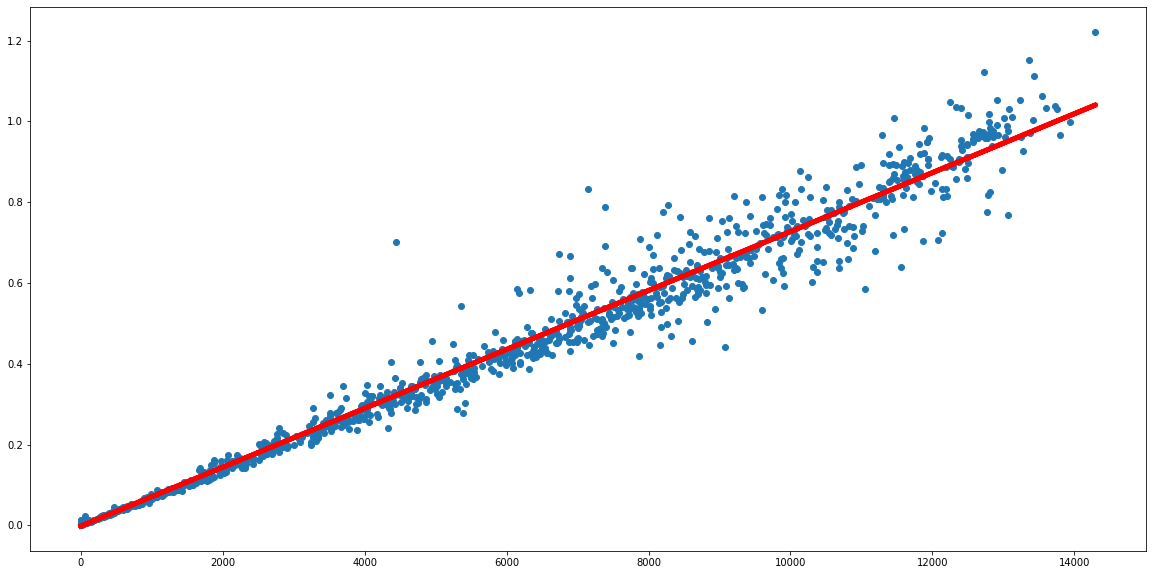

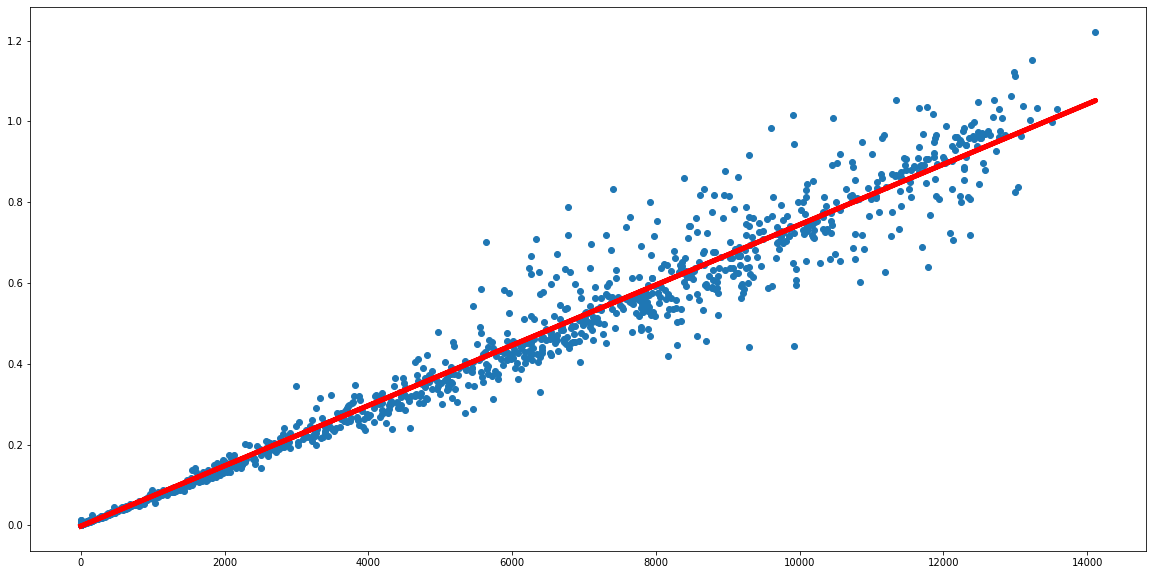

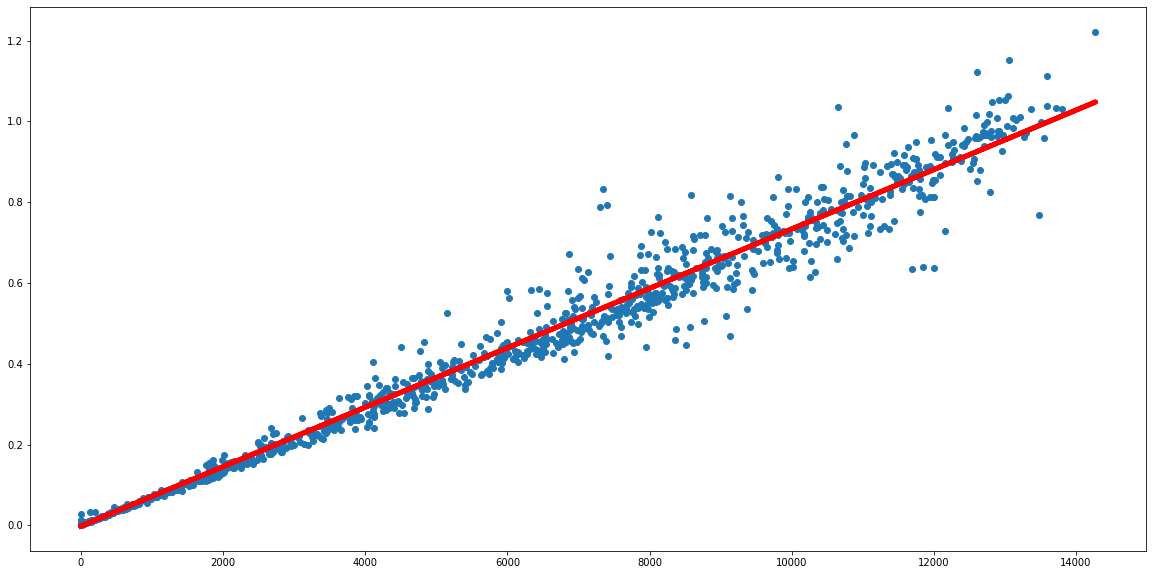

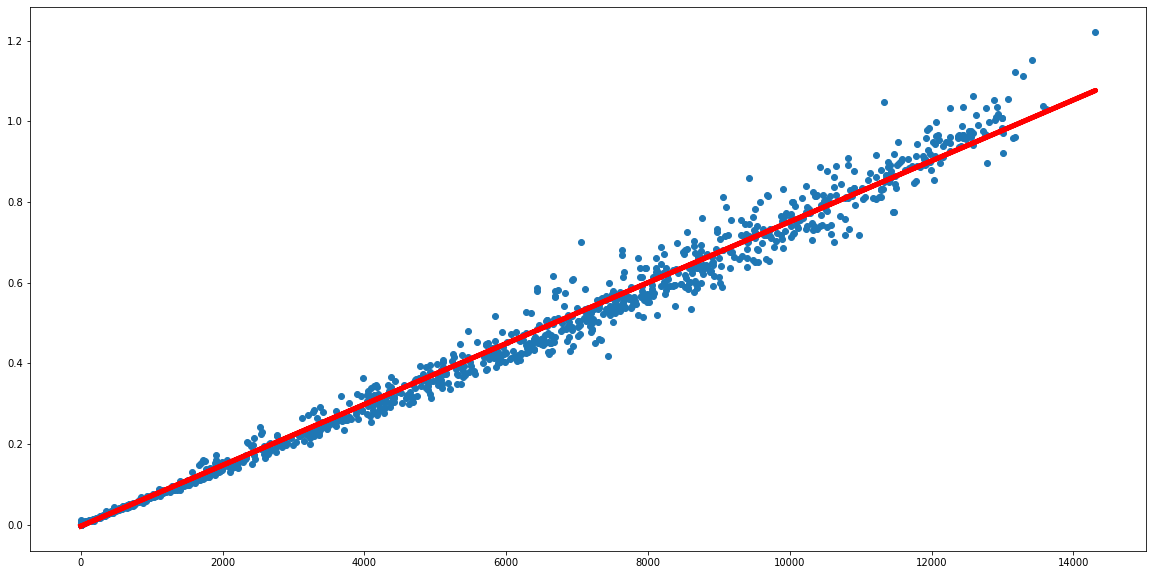

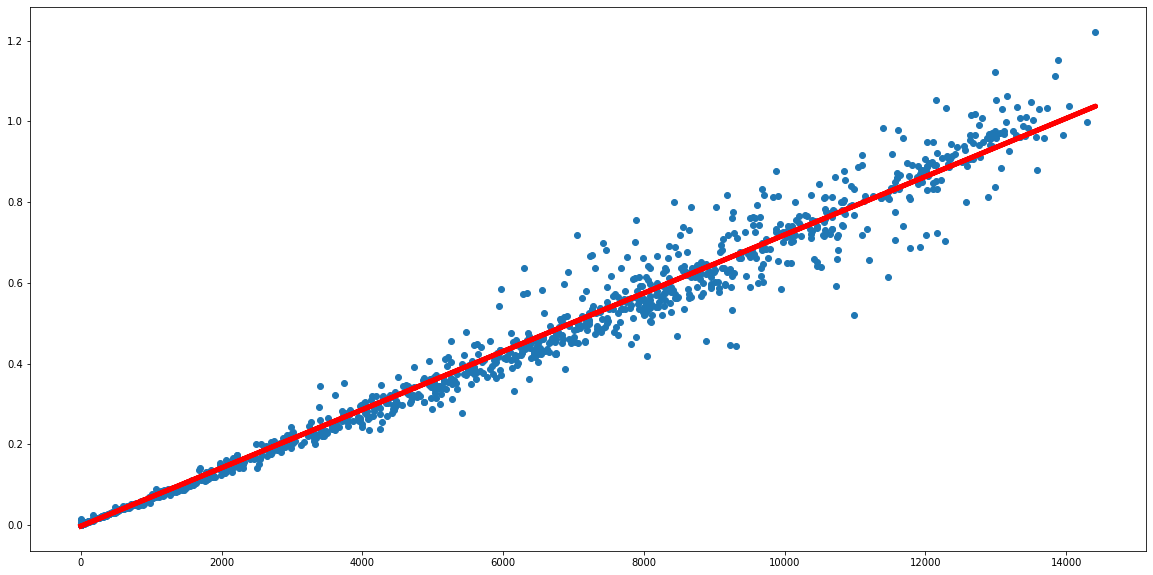

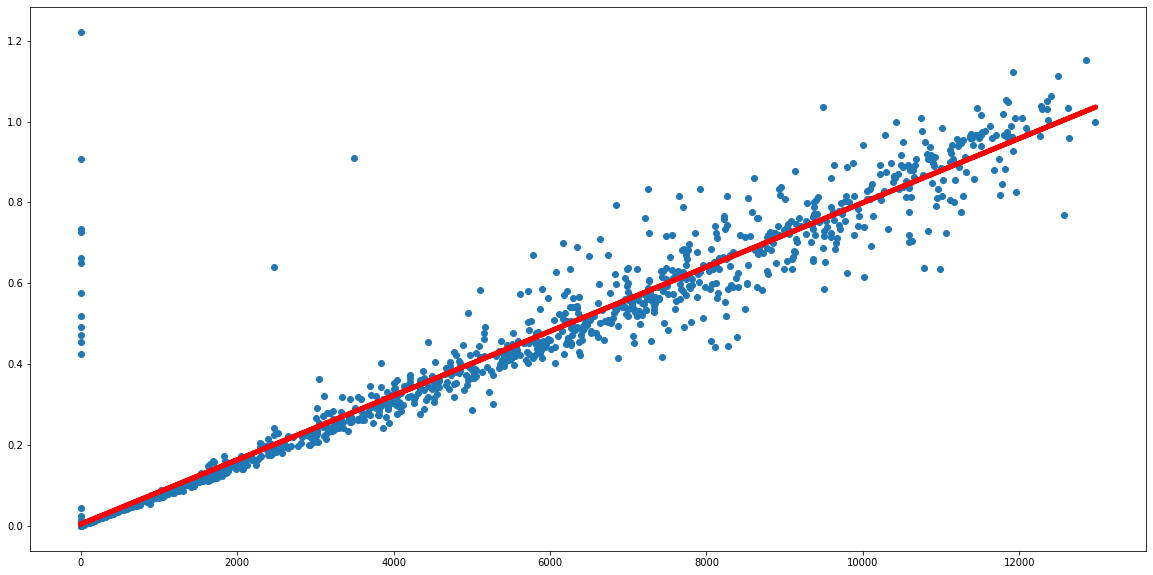

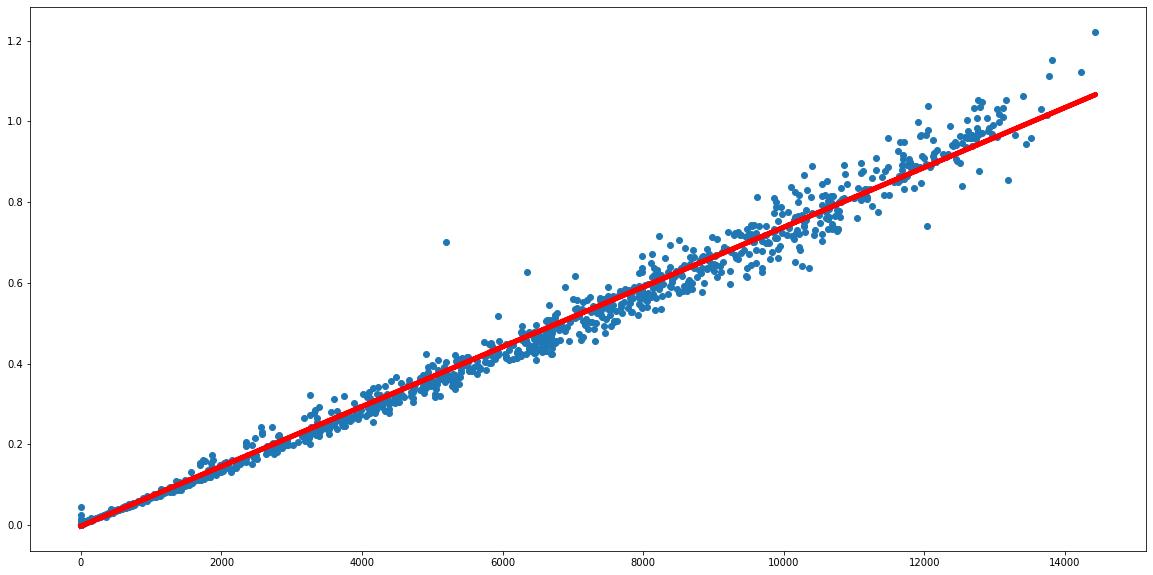

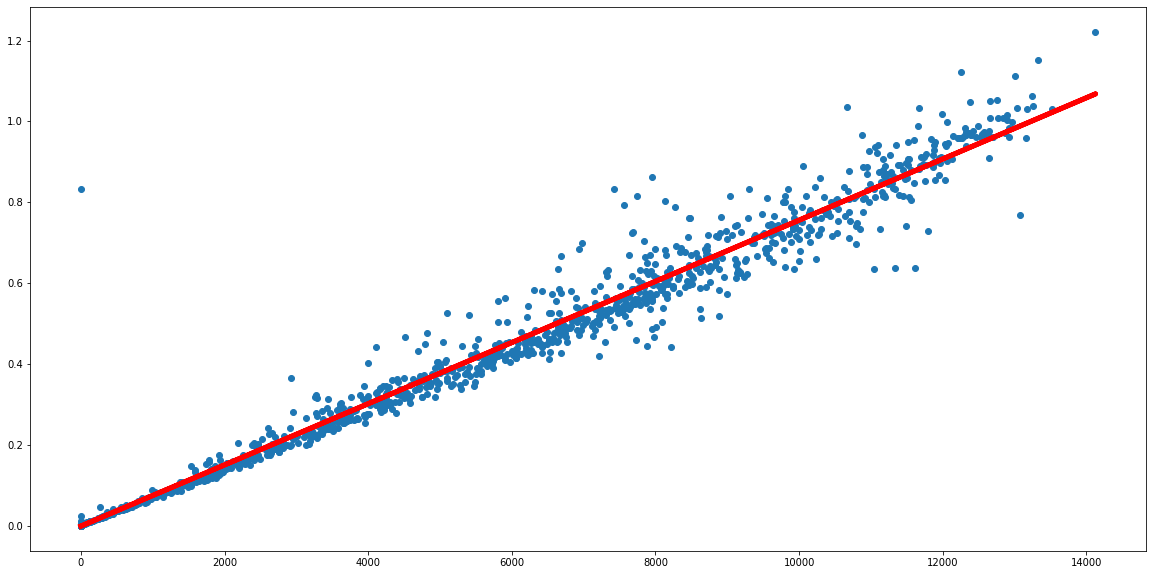

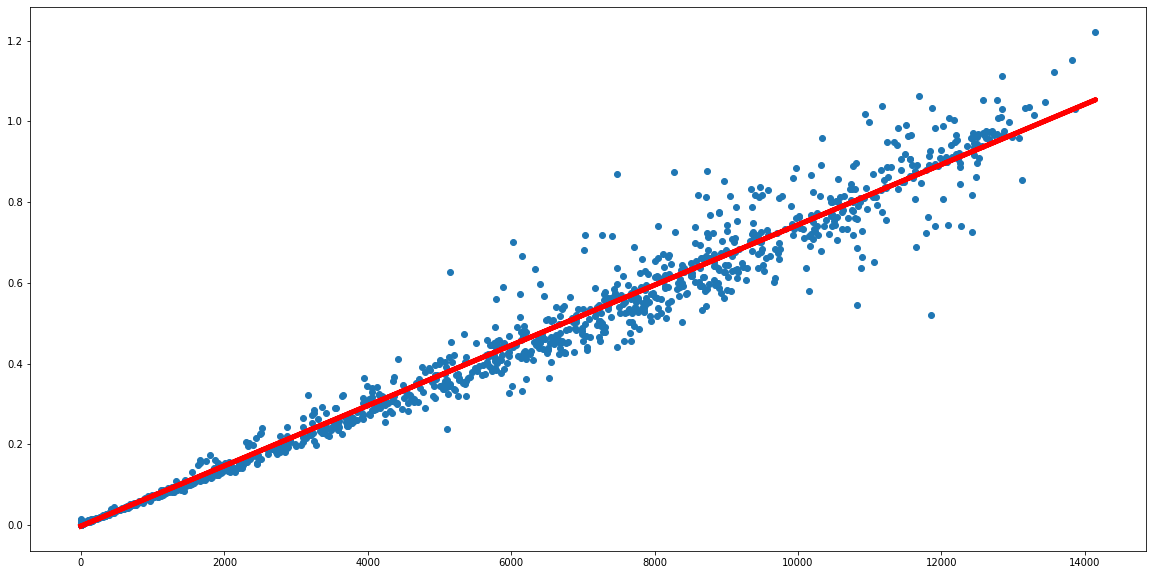

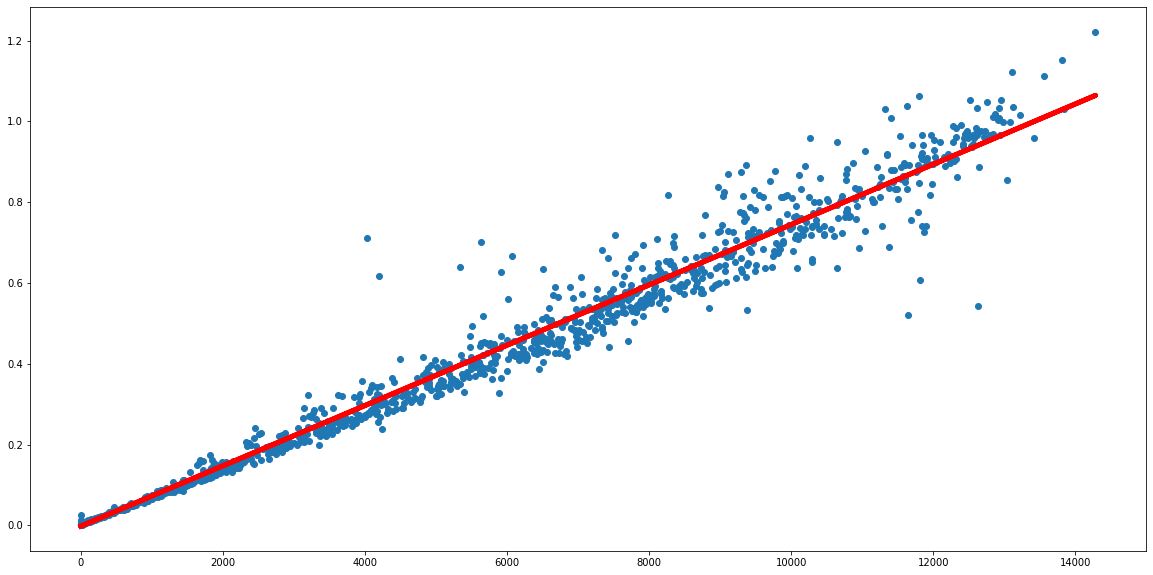

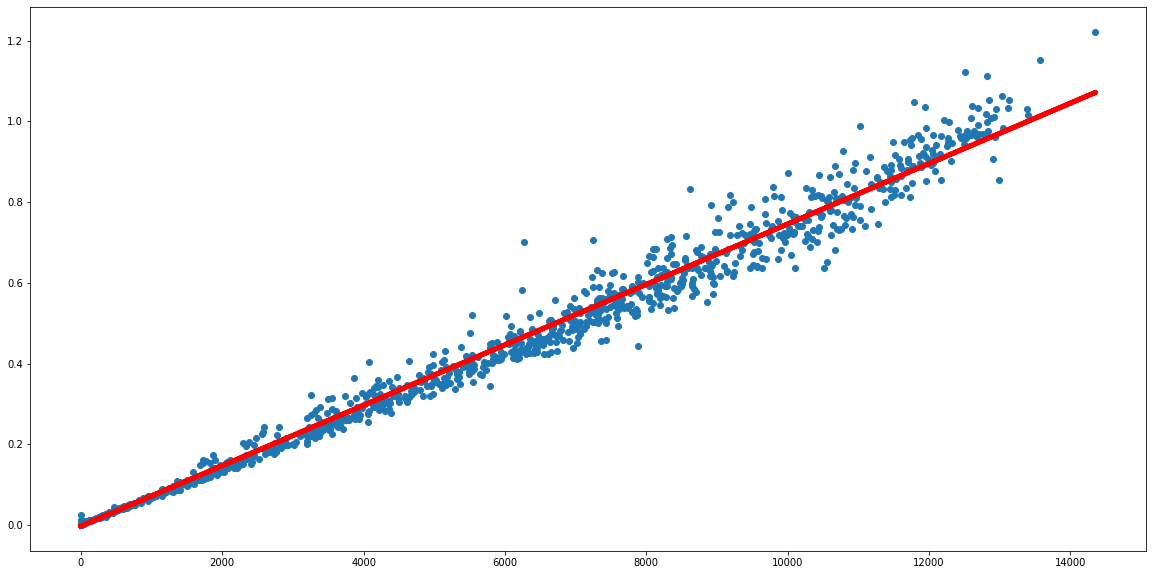

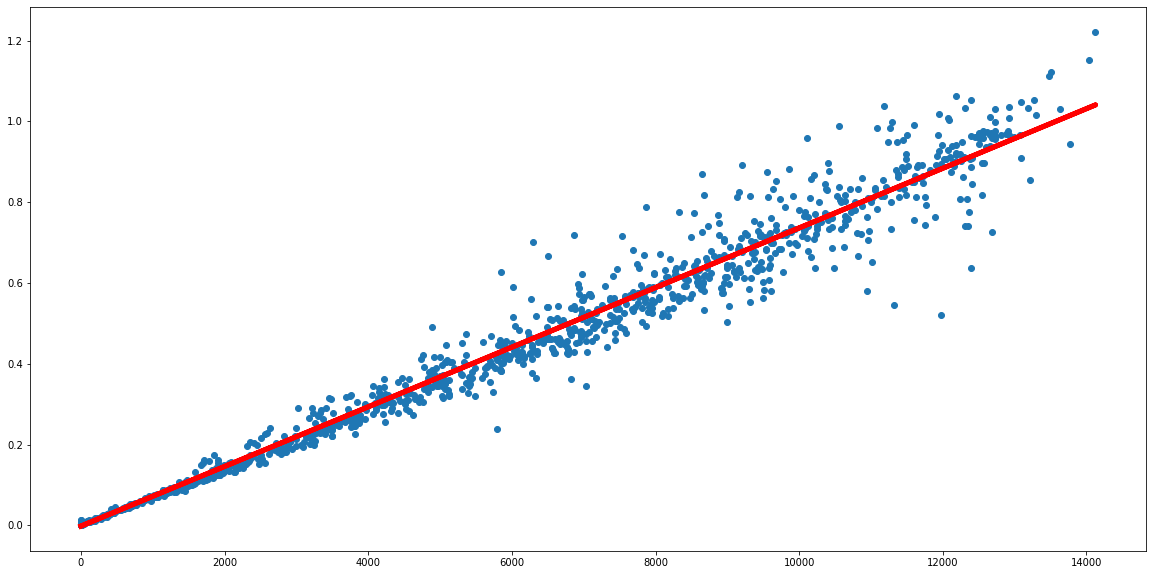

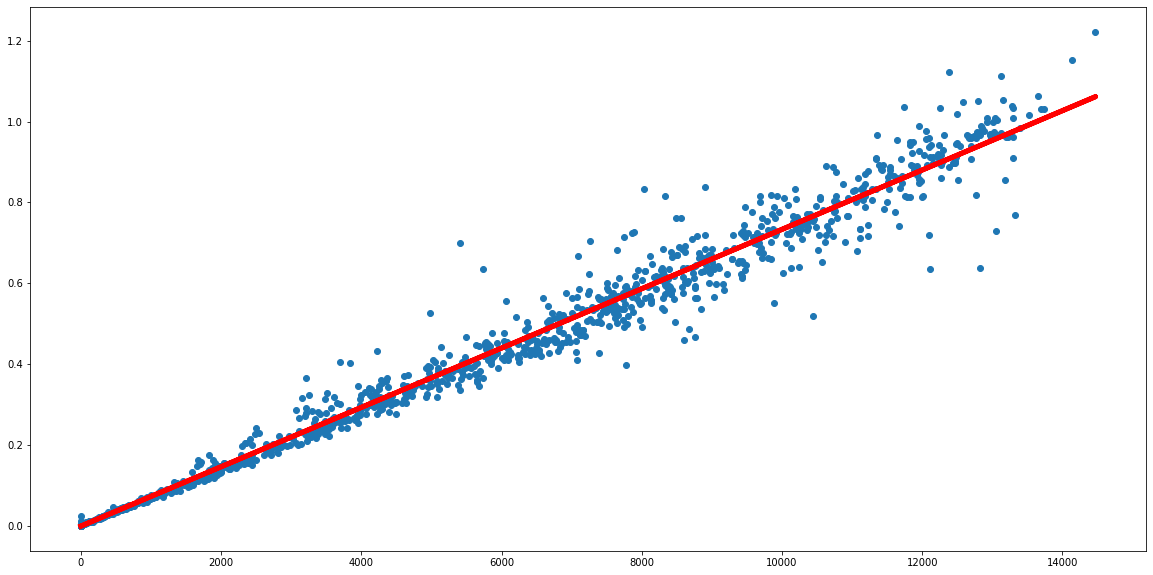

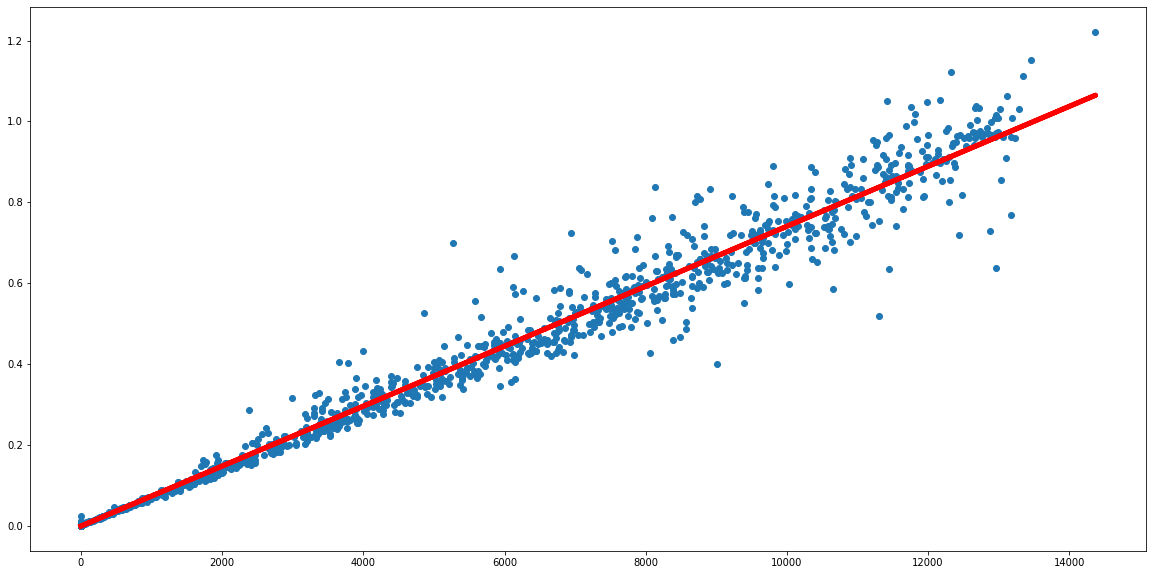

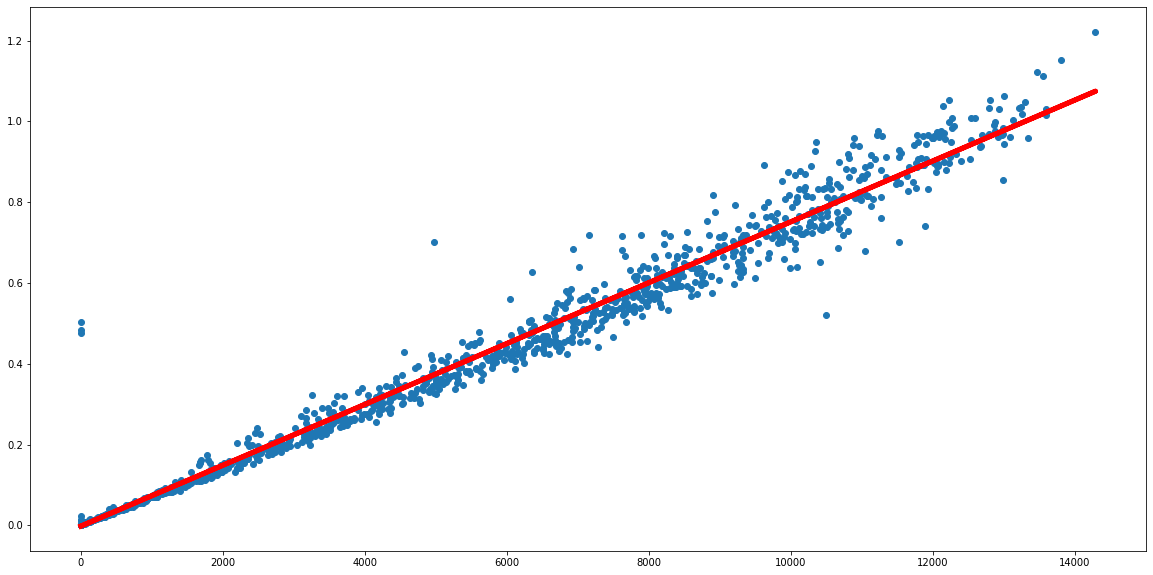

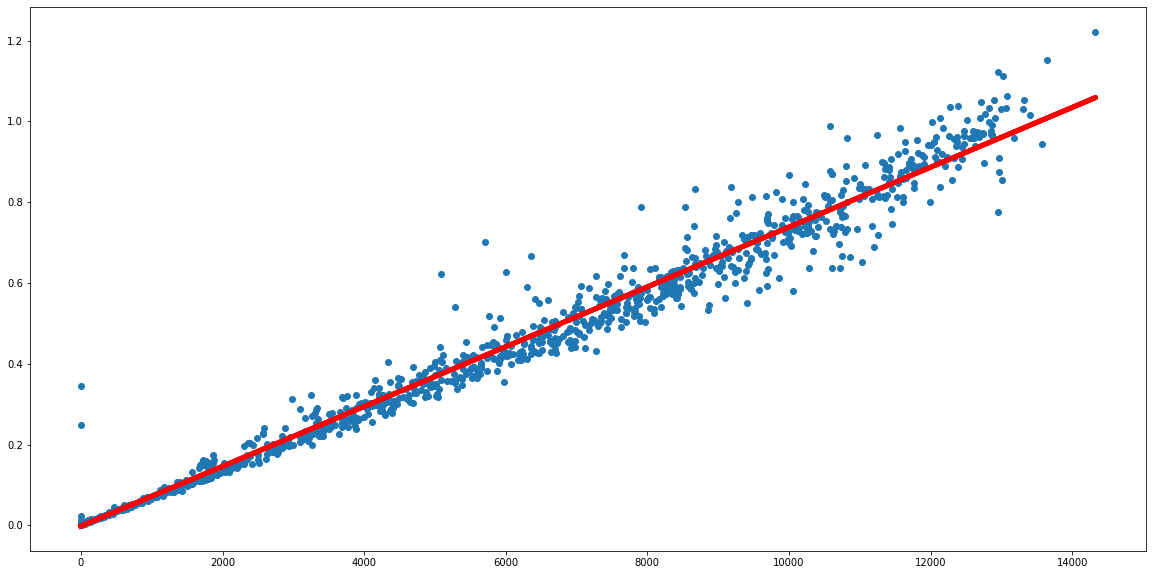

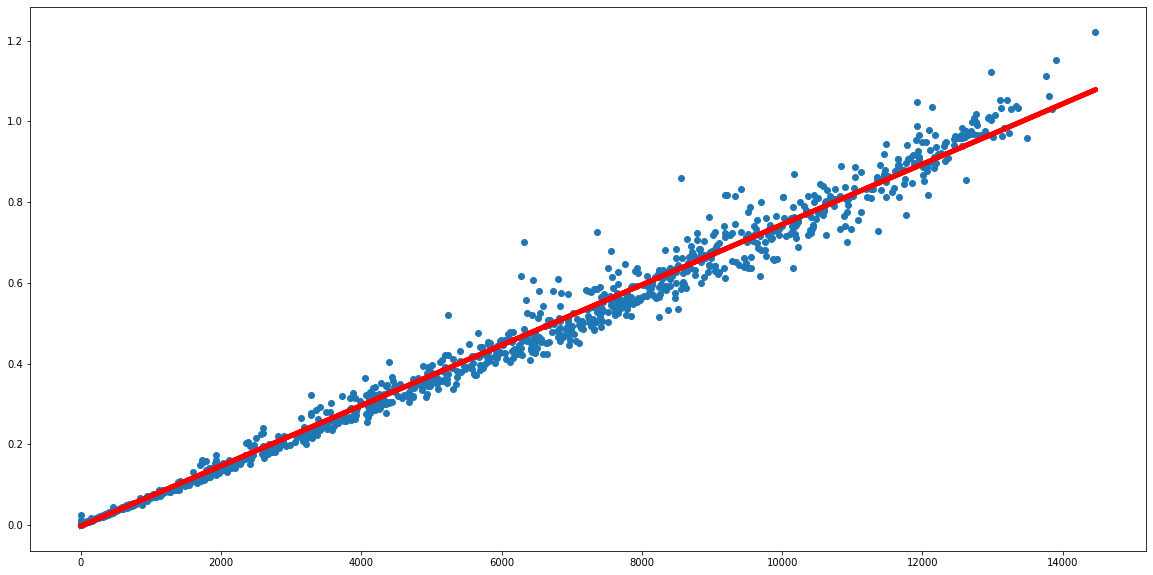

In [16]:
for key in merged_df['SOURCE_KEY_x'].unique():
    inv_data = merged_df[merged_df['SOURCE_KEY_x'] == key]
    y = inv_data['IRRADIATION']
    x = inv_data['DC_POWER']
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, 'o')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, linewidth=5, color='red')
    plt.show()

(array([1., 6., 4., 6., 3., 0., 0., 1., 0., 1.]),
 array([0.00073865, 0.00074603, 0.00075341, 0.00076079, 0.00076817,
        0.00077555, 0.00078293, 0.00079031, 0.00079769, 0.00080508,
        0.00081246]),
 <BarContainer object of 10 artists>)

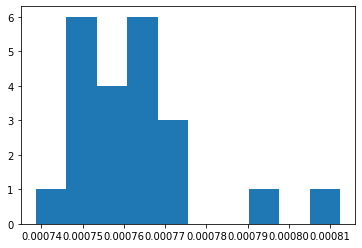

In [21]:
plt.hist(ms)

In [24]:
np.mean(ms) + 3 * np.std(ms)

0.0008114713090993346

In [23]:
ms

[0.0007975282128443703,
 0.000748923580957548,
 0.0007497567113869944,
 0.0007664915963270694,
 0.000747358497195566,
 0.0007463402479903013,
 0.0007638174258350421,
 0.0007529307528610275,
 0.0007719077750015997,
 0.0007386499386507249,
 0.0008124562618115104,
 0.0007578669253649118,
 0.0007746984464591464,
 0.0007636065067779025,
 0.0007640003810025424,
 0.0007658792241256485,
 0.0007556859777898987,
 0.0007513593034579254,
 0.0007593059378402595,
 0.0007708908946265871,
 0.0007576757436617548,
 0.0007646688682614589]